In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text                   
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                              
import json  
from nltk.corpus import stopwords                  # to detect stopwords
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import warnings                                    # To ignore the warnings
warnings.filterwarnings('ignore')   
import string 

import matplotlib.pyplot as plt
import seaborn as sns
import time                                        # to check the processing time


In [4]:
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error                      # To check the mean square error 

In [7]:
books = pd.read_json("C:/Users/sweet/OneDrive/NIIT(Level3)/Books.json.gz", lines = True, nrows =  200000)
books.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,False,"08 12, 2005",A1C6M8LCIX4M6M,0001713353,{'Format:': ' Paperback'},June Bug,This book is a winner with both of my boys. T...,Children's favorite,1123804800,NaN,NaN
1,5,False,"03 30, 2005",A1REUF3A1YCPHM,0001713353,{'Format:': ' Hardcover'},TW Ervin II,"The King, the Mice and the Cheese by Nancy Gur...",A story children will love and learn from,1112140800,NaN,NaN
2,5,False,"04 4, 2004",A1YRBRK2XM5D5,0001713353,{'Format:': ' Hardcover'},Rebecca L. Menner,My daughter got her first copy from her great-...,Third copy,1081036800,5,NaN


In [8]:
meta = pd.read_json("C:/Users/sweet/OneDrive/NIIT(Level3)/meta_Books.json.gz", lines = True, nrows =  200000)
meta.sample(3)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
152902,"[Books, History, Americas]",,[],,Houses with Names: The Italian Immigrants of H...,[],,Visit Amazon's Adria Bernardi Page,[],"1,674,912 in Books (",[],Books,,,$34.00,0252015819,[],[]
180566,"[Books, Literature &amp; Fiction, Mythology &a...",,[A poor boy named Aladdin asks for a wish from...,,Disney's Aladdin The Magic Carpet Ride,[],,Teddy Slater Margulies,[],"3,083,086 in Books (",[],Books,,,$14.80,0307301443,[],[]
68103,"[Books, Travel, Food, Lodging &amp; Transporta...",,"[Published in the UK, and for anyone who lives...",,Real beer in London,[],,Campaign for Real Ale,[],"20,777,561 in Books (",[],Books,,,$8.54,0099134306,[],[]


In [9]:
data1 = books[['asin','verified' ,'reviewText', 'overall', 'unixReviewTime','reviewerName' ,'reviewTime', 'reviewerID','summary']]
# Feature Selection for data2
data1.head(1)

,asin,verified,reviewText,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,summary
0,0001713353,False,This book is a winner with both of my boys. T...,5,1123804800,June Bug,"08 12, 2005",A1C6M8LCIX4M6M,Children's favorite


In [10]:
data2 = meta[['asin', 'title','price', 'category', 'brand']]
data2.head(1)

,asin,title,price,category,brand
0,0000092878,Biology Gods Living Creation Third Edition 10 ...,$39.94,[],Keith Graham


In [11]:
B_data = pd.merge(data1, data2, on = 'asin')
B_data.head(3)

,asin,verified,reviewText,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,summary,title,price,category,brand
0,0001713353,False,This book is a winner with both of my boys. T...,5,1123804800,June Bug,"08 12, 2005",A1C6M8LCIX4M6M,Children's favorite,"King, the Mice and the Cheese (Beginner Books)",$12.33,"[Books, Children's Books, Literature & Fiction]",Visit Amazon's Nancy Gurney Page
1,0001713353,False,"The King, the Mice and the Cheese by Nancy Gur...",5,1112140800,TW Ervin II,"03 30, 2005",A1REUF3A1YCPHM,A story children will love and learn from,"King, the Mice and the Cheese (Beginner Books)",$12.33,"[Books, Children's Books, Literature & Fiction]",Visit Amazon's Nancy Gurney Page
2,0001713353,False,My daughter got her first copy from her great-...,5,1081036800,Rebecca L. Menner,"04 4, 2004",A1YRBRK2XM5D5,Third copy,"King, the Mice and the Cheese (Beginner Books)",$12.33,"[Books, Children's Books, Literature & Fiction]",Visit Amazon's Nancy Gurney Page


# DATA EXPLORATION

In [12]:
B_data.shape

(200000, 13)

In [13]:
B_data.describe()

,overall,unixReviewTime
count,200000.000000,2.000000e+05
mean,4.364205,1.350856e+09
std,1.089048,1.480840e+08
min,1.000000,8.710848e+08
25%,4.000000,1.324253e+09
50%,5.000000,1.400544e+09
75%,5.000000,1.445904e+09
max,5.000000,1.524701e+09


In [14]:
B_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   asin            200000 non-null  object
 1   verified        200000 non-null  bool  
 2   reviewText      199955 non-null  object
 3   overall         200000 non-null  int64 
 4   unixReviewTime  200000 non-null  int64 
 5   reviewerName    199996 non-null  object
 6   reviewTime      200000 non-null  object
 7   reviewerID      200000 non-null  object
 8   summary         199977 non-null  object
 9   title           200000 non-null  object
 10  price           200000 non-null  object
 11  category        200000 non-null  object
 12  brand           200000 non-null  object
dtypes: bool(1), int64(2), object(10)
memory usage: 20.0+ MB


# Dataset Details


This file has reviewer ID ,

Reviewer Name,

Reviewer text,

Summary(obtained from Reviewer text),

Overall Rating on a scale 5,

Review time

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

brand - brand of the product

title - title of the kindle

price - price of the product

# DATA PREPROCESSING

In [16]:
B_data = B_data.astype('str').drop_duplicates()

In [17]:
B_data.shape

(199471, 13)

In [18]:
B_data.isnull().sum()

asin              0
verified          0
reviewText        0
overall           0
unixReviewTime    0
reviewerName      0
reviewTime        0
reviewerID        0
summary           0
title             0
price             0
category          0
brand             0
dtype: int64

# DATA CLEANING

In [19]:
# Creating cleaning function
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    text = text.lower()
    return text

In [20]:
# Calling the cleaning function for reviewText column
B_data["reviewText"] = B_data["reviewText"].apply(cleaning)

In [21]:
# Calling the cleaning function for summary column
B_data["summary"] = B_data["summary"].apply(cleaning)

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\komal
[nltk_data]     khanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words('english'))

punctuations=string.punctuation
#'
B_data['processed_text']=B_data['reviewText'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word not in stop_words and word not in punctuations]))

B_data['summary_text']=B_data['summary'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word not in stop_words and word not in punctuations]))

B_data['text']=B_data['processed_text']+" "+B_data['summary_text']

In [24]:
pattern = re.compile(r'\$')

In [26]:
B_data['price'] = [re.sub(pattern, '', p) for p in B_data['price']] #removing $ sign from price column

In [27]:
B_data.sample(6)

,asin,verified,reviewText,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,summary,title,price,category,brand,processed_text,summary_text,text
166600,000711835X,True,it is a great tale full of adventure and dange...,5,1427846400,Danna Morris,"04 1, 2015",AD4PGC63UWZIZ,amazing,The Hobbit,77.95,"['Books', 'Literature & Fiction', 'Classics']",Visit Amazon's J. R. R. Tolkien Page,great tale full adventure danger fun would rec...,amazing,great tale full adventure danger fun would rec...
134278,0006499260,True,this novel had a little more personal activiti...,3,1288310400,Jo Keller,"10 29, 2010",A3L0IRNHPF6MH6,reverse of medal,The Reverse of the Medal,14.11,"['Books', 'Literature & Fiction', 'Genre Ficti...",Visit Amazon's Patrick O'Brian Page,novel little personal activities less naval ac...,reverse medal,novel little personal activities less naval ac...
112077,0006280935,False,aside from novels this is the first c s lewis ...,3,1360800000,Barbara,"02 14, 2013",A1UCOGHLHDRY32,painful reading,The Problem of Pain,52.32,"['Books', 'History']",Visit Amazon's C.S. Lewis Page,aside novels first c lewis read deep erudite b...,painful reading,aside novels first c lewis read deep erudite b...
85209,0001047868,True,a classic children s tale told from the perspe...,4,1394755200,Bratty_me27,"03 14, 2014",A3BPB6JM53EFZJ,kidnapped,Kidnapped (HarperCollinsAudioBooks),,"['Books', 'Literature & Fiction', 'Classics']",Visit Amazon's Robert Louis Stevenson Page,classic children tale told perspective kidnape...,kidnapped,classic children tale told perspective kidnape...
81439,0006064922,True,very good version,5,1420934400,Daniel J Goble jr.,"01 11, 2015",AWG8K6HSMPHPO,five stars,The Holy Bible from the ancient Eastern text :...,,"['Books', 'Christian Books &amp; Bibles', 'Bib...",,good version,five stars,good version five stars
51009,0002171856,True,this is a must have plain and simple,5,1471824000,Ralph Sizzle,"08 22, 2016",A118EPNQE8ZEOQ,buy this now,The Sas Survival Handbook,9.45,"['Books', 'History', 'Military']",John Wiseman,must plain simple,buy,must plain simple buy


In [28]:
B_data.drop(['summary', 'reviewText','processed_text','summary_text'], axis=1, inplace=True)
B_data.head(2)

,asin,verified,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,title,price,category,brand,text
0,0001713353,False,5,1123804800,June Bug,"08 12, 2005",A1C6M8LCIX4M6M,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,book winner boys really enjoy pictures story c...
1,0001713353,False,5,1112140800,TW Ervin II,"03 30, 2005",A1REUF3A1YCPHM,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,king mice cheese nancy gurney excellent childr...


In [29]:
# Checking Information
B_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199471 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   asin            199471 non-null  object
 1   verified        199471 non-null  object
 2   overall         199471 non-null  object
 3   unixReviewTime  199471 non-null  object
 4   reviewerName    199471 non-null  object
 5   reviewTime      199471 non-null  object
 6   reviewerID      199471 non-null  object
 7   title           199471 non-null  object
 8   price           199471 non-null  object
 9   category        199471 non-null  object
 10  brand           199471 non-null  object
 11  text            199471 non-null  object
dtypes: object(12)
memory usage: 19.8+ MB


In [30]:
# converting the data type of overall with integer type
B_data.overall= B_data.overall.astype('int8')

In [31]:
# converting the data type of reviewTime with date type
B_data['reviewTime'] = pd.to_datetime(B_data['reviewTime'])

# SENTIMENT ANALYSIS

What is sentiment analysis?

- Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.
- Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

In [36]:
# Assigning the Positive Negative and Neutral Sentiment ob the basis of overall column
a=[]
for x in B_data['overall']: 
    if x>3:
        x='Positive'
        a.append(x)
    elif x==3:
        x='Neutral'
        a.append(x)
    else:
        x='Negitive'
        a.append(x)

In [37]:
B_data['sentiment'] =  a

In [38]:
B_data.head(3)

,asin,verified,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,title,price,category,brand,text,sentiment
0,0001713353,False,5,1123804800,June Bug,2005-08-12,A1C6M8LCIX4M6M,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,book winner boys really enjoy pictures story c...,Positive
1,0001713353,False,5,1112140800,TW Ervin II,2005-03-30,A1REUF3A1YCPHM,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,king mice cheese nancy gurney excellent childr...,Positive
2,0001713353,False,5,1081036800,Rebecca L. Menner,2004-04-04,A1YRBRK2XM5D5,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,daughter got first copy great-grandmother fath...,Positive


# VADER


VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
- VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
- For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [39]:
# downloding the vader lexicon 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\komal
[nltk_data]     khanna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
# Getting the polarity of reviewText 
from tqdm.notebook import tqdm                     # library for adding progress bar
res2 = {}
t = 0
for i, j in tqdm(B_data.iterrows(), total=len(B_data)):
    text = j['text']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/199471 [00:00<?, ?it/s]

In [42]:
# Transposing the dataframe
b = pd.DataFrame(res2).T
b

,neg,neu,pos,compound
0,0.000,0.405,0.595,0.8832
1,0.051,0.652,0.297,0.9790
2,0.106,0.456,0.438,0.9460
3,0.000,0.464,0.536,0.9818
4,0.000,0.260,0.740,0.9766
...,...,...,...,...
199466,0.112,0.670,0.218,0.4404
199467,0.097,0.564,0.339,0.8271
199468,0.000,1.000,0.000,0.0000
199469,0.292,0.413,0.295,0.2960


In [43]:
# concating the main data and the Polarity Scores
M_data = pd.concat([B_data, b], axis = 1)

In [44]:
M_data.isnull().sum()

asin              529
verified          529
overall           529
unixReviewTime    529
reviewerName      529
reviewTime        529
reviewerID        529
title             529
price             529
category          529
brand             529
text              529
sentiment         529
neg               529
neu               529
pos               529
compound          529
dtype: int64

In [45]:
# Dropping the null values
M_data.dropna(inplace = True)

In [46]:
# Creating the Class column based on compound column
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'pos'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'neg'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neu'

In [47]:
# giving the datetiem index for reviewtime on the basis of year and month
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

In [48]:
M_data.isnull().sum()

Class             0
asin              0
verified          0
overall           0
unixReviewTime    0
reviewerName      0
reviewTime        0
reviewerID        0
title             0
price             0
category          0
brand             0
text              0
sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
dtype: int64

In [49]:
M_data.shape

(198942, 20)

In [50]:
# converting thedata into CSV file
M_data.to_csv("M_data_book_final.csv")

# TEXT CLASSIFICATION


Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In [5]:
# importing the data set which we have created
df = pd.read_csv("C:/Users/sweet/Downloads/M_data_book_final.csv")
df.head()

,Unnamed: 0,Class,asin,verified,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,title,...,category,brand,text,sentiment,neg,neu,pos,compound,year,month
0,0,pos,1713353,False,5,1123804800,June Bug,12-08-2005,A1C6M8LCIX4M6M,"King, the Mice and the Cheese (Beginner Books)",...,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,book winner boys really enjoy pictures story c...,Positive,0.000,0.405,0.595,0.8832,2005,8
1,1,pos,1713353,False,5,1112140800,TW Ervin II,30-03-2005,A1REUF3A1YCPHM,"King, the Mice and the Cheese (Beginner Books)",...,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,king mice cheese nancy gurney excellent childr...,Positive,0.051,0.652,0.297,0.9790,2005,3
2,2,pos,1713353,False,5,1081036800,Rebecca L. Menner,04-04-2004,A1YRBRK2XM5D5,"King, the Mice and the Cheese (Beginner Books)",...,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,daughter got first copy great-grandmother fath...,Positive,0.106,0.456,0.438,0.9460,2004,4
3,3,pos,1713353,False,5,1077321600,Mindy Stone,21-02-2004,A1V8ZR5P78P4ZU,"King, the Mice and the Cheese (Beginner Books)",...,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,remember book child years ago remember wonderf...,Positive,0.000,0.464,0.536,0.9818,2004,2
4,4,pos,1713353,True,5,1475452800,B. Deniger,03-10-2016,A2ZB06582NXCIV,"King, the Mice and the Cheese (Beginner Books)",...,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,remembered one favorites childhood great condi...,Positive,0.000,0.260,0.740,0.9766,2016,10


In [7]:
# dropping the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [8]:
df.isnull().sum()

Class                 0
asin                  0
verified              0
overall               0
unixReviewTime        0
reviewerName         12
reviewTime            0
reviewerID            0
title                 0
price             23312
category              0
brand              5951
text                  0
sentiment             0
neg                   0
neu                   0
pos                   0
compound              0
year                  0
month                 0
dtype: int64

In [7]:
#df.dropna('price','brand','reviewerName', axis = 1, inplace = True)

In [9]:
# dropping the null values
df.dropna(inplace = True)

In [10]:
df.shape

(175399, 20)

In [10]:
# For WordCloud
from wordcloud import WordCloud, STOPWORDS        # For Word Cloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['text']))
    fig = plt.figure(figsize = (10, 10))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [63]:
neg=df[df["sentiment"] == "Negitive"]["text"]
pos=df[df["sentiment"] == "Positive"]["text"]
neu=df[df["sentiment"] == "Neutral"]["text"]

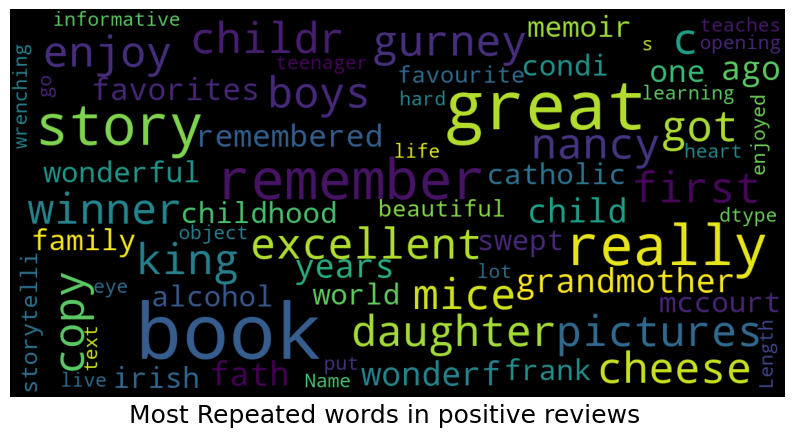

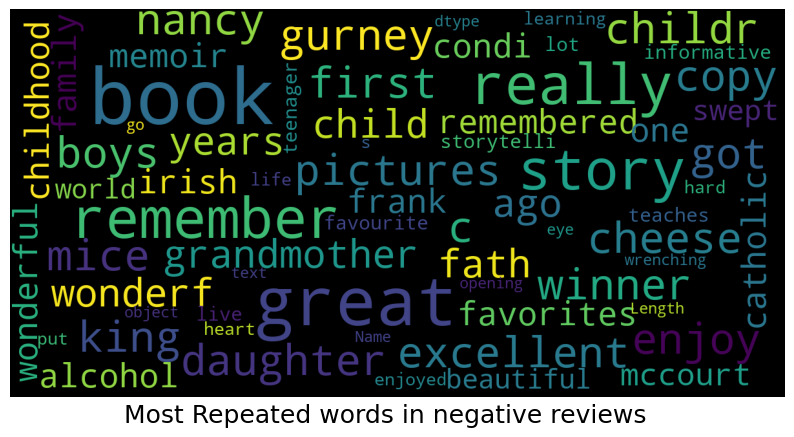

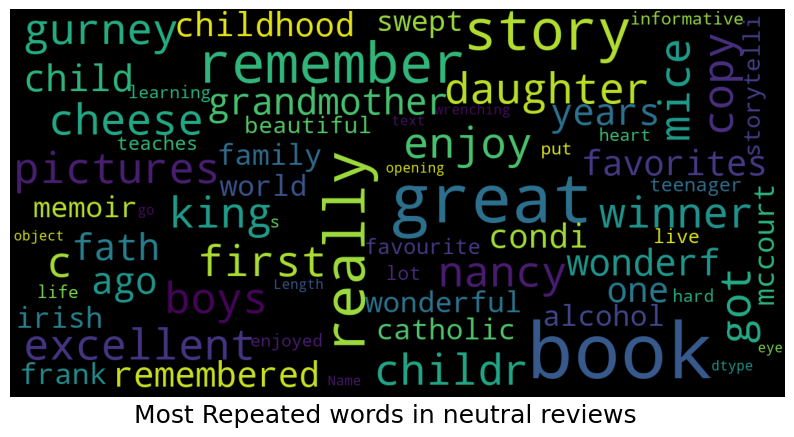

In [64]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

# NGRAMS

In [65]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [66]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (25, 20))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5 ,color ='green')
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5 ,color ='cyan')
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5,color ='yellow')
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

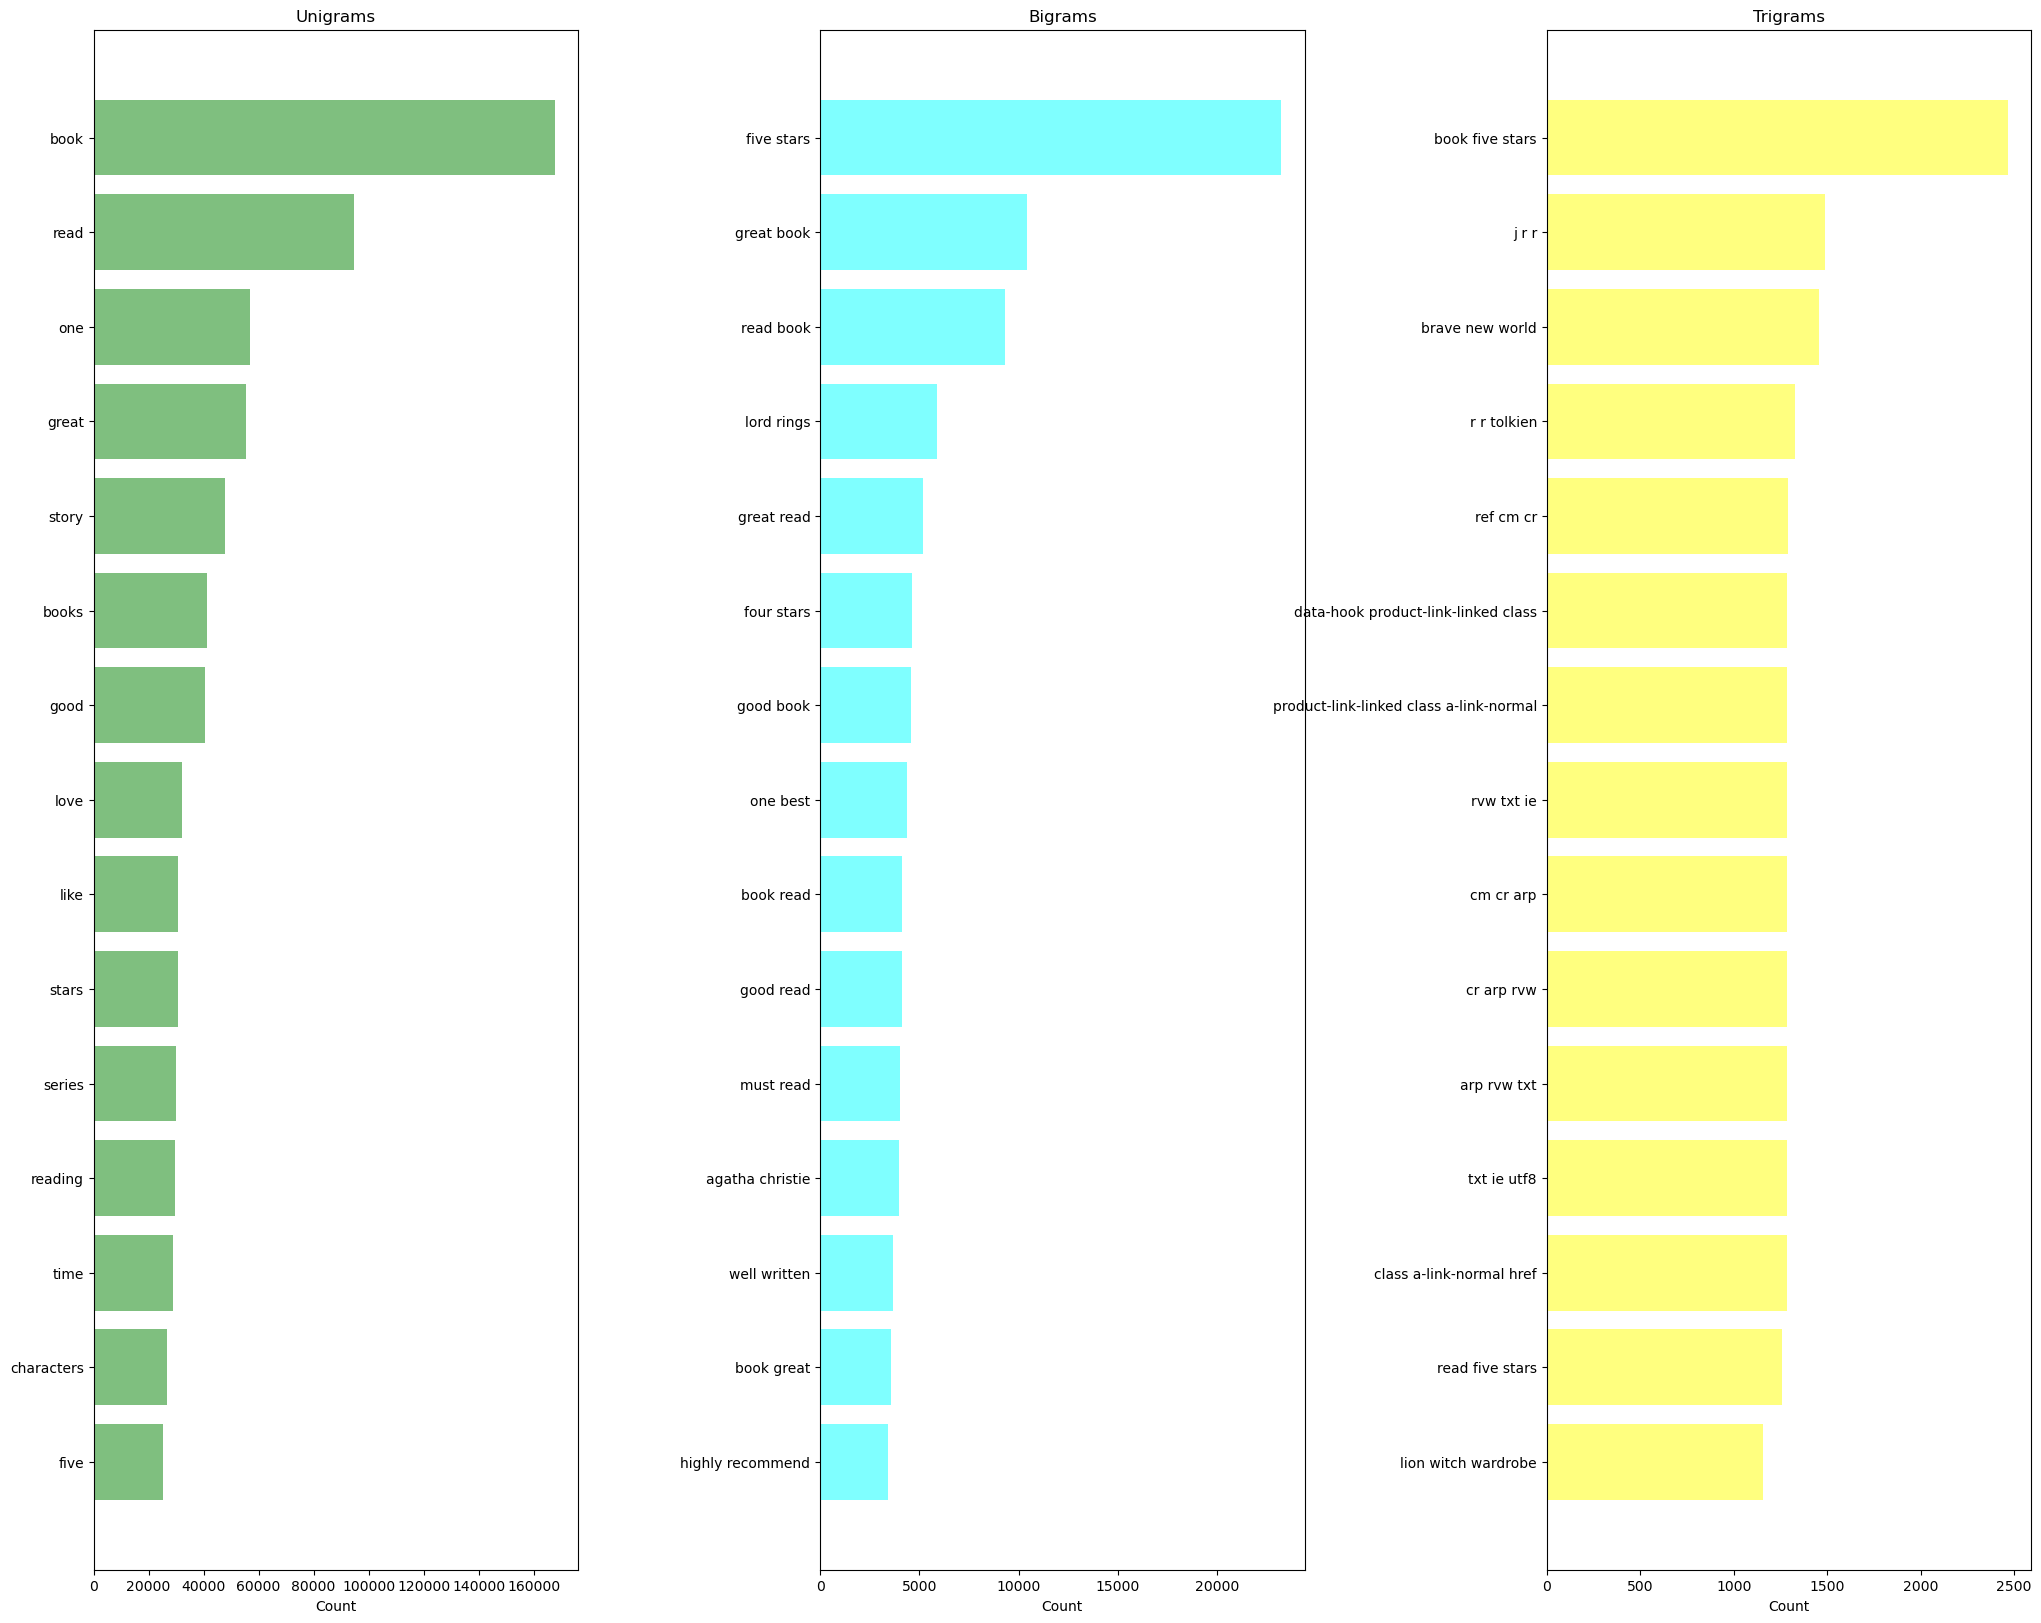

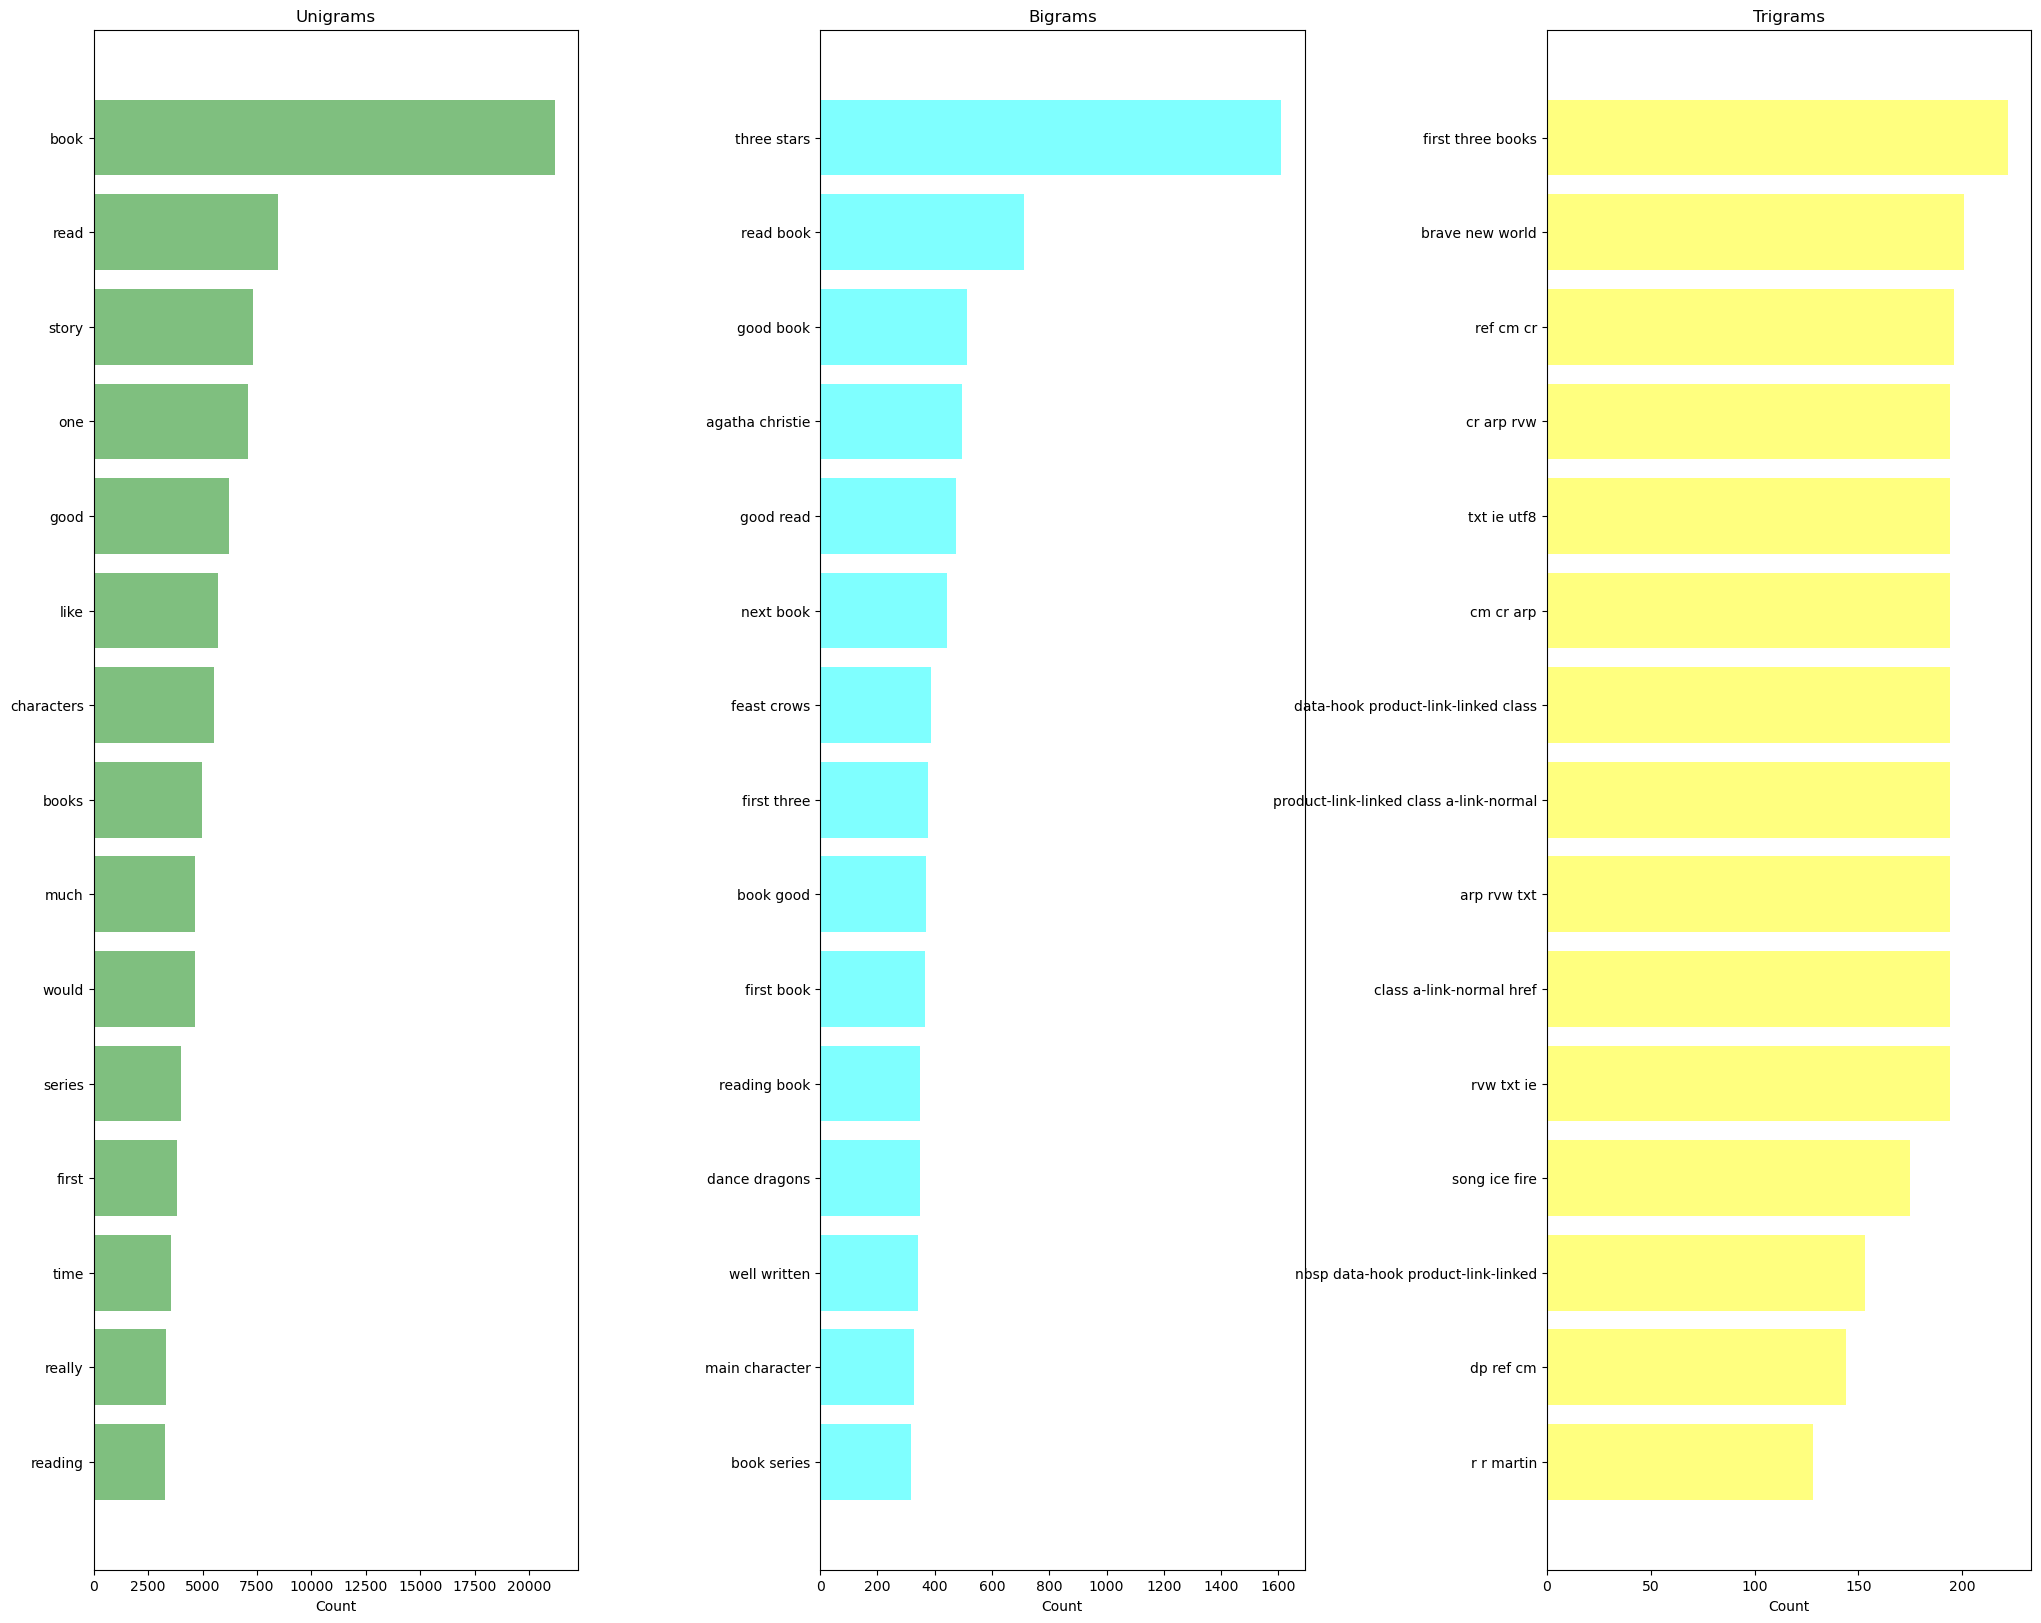

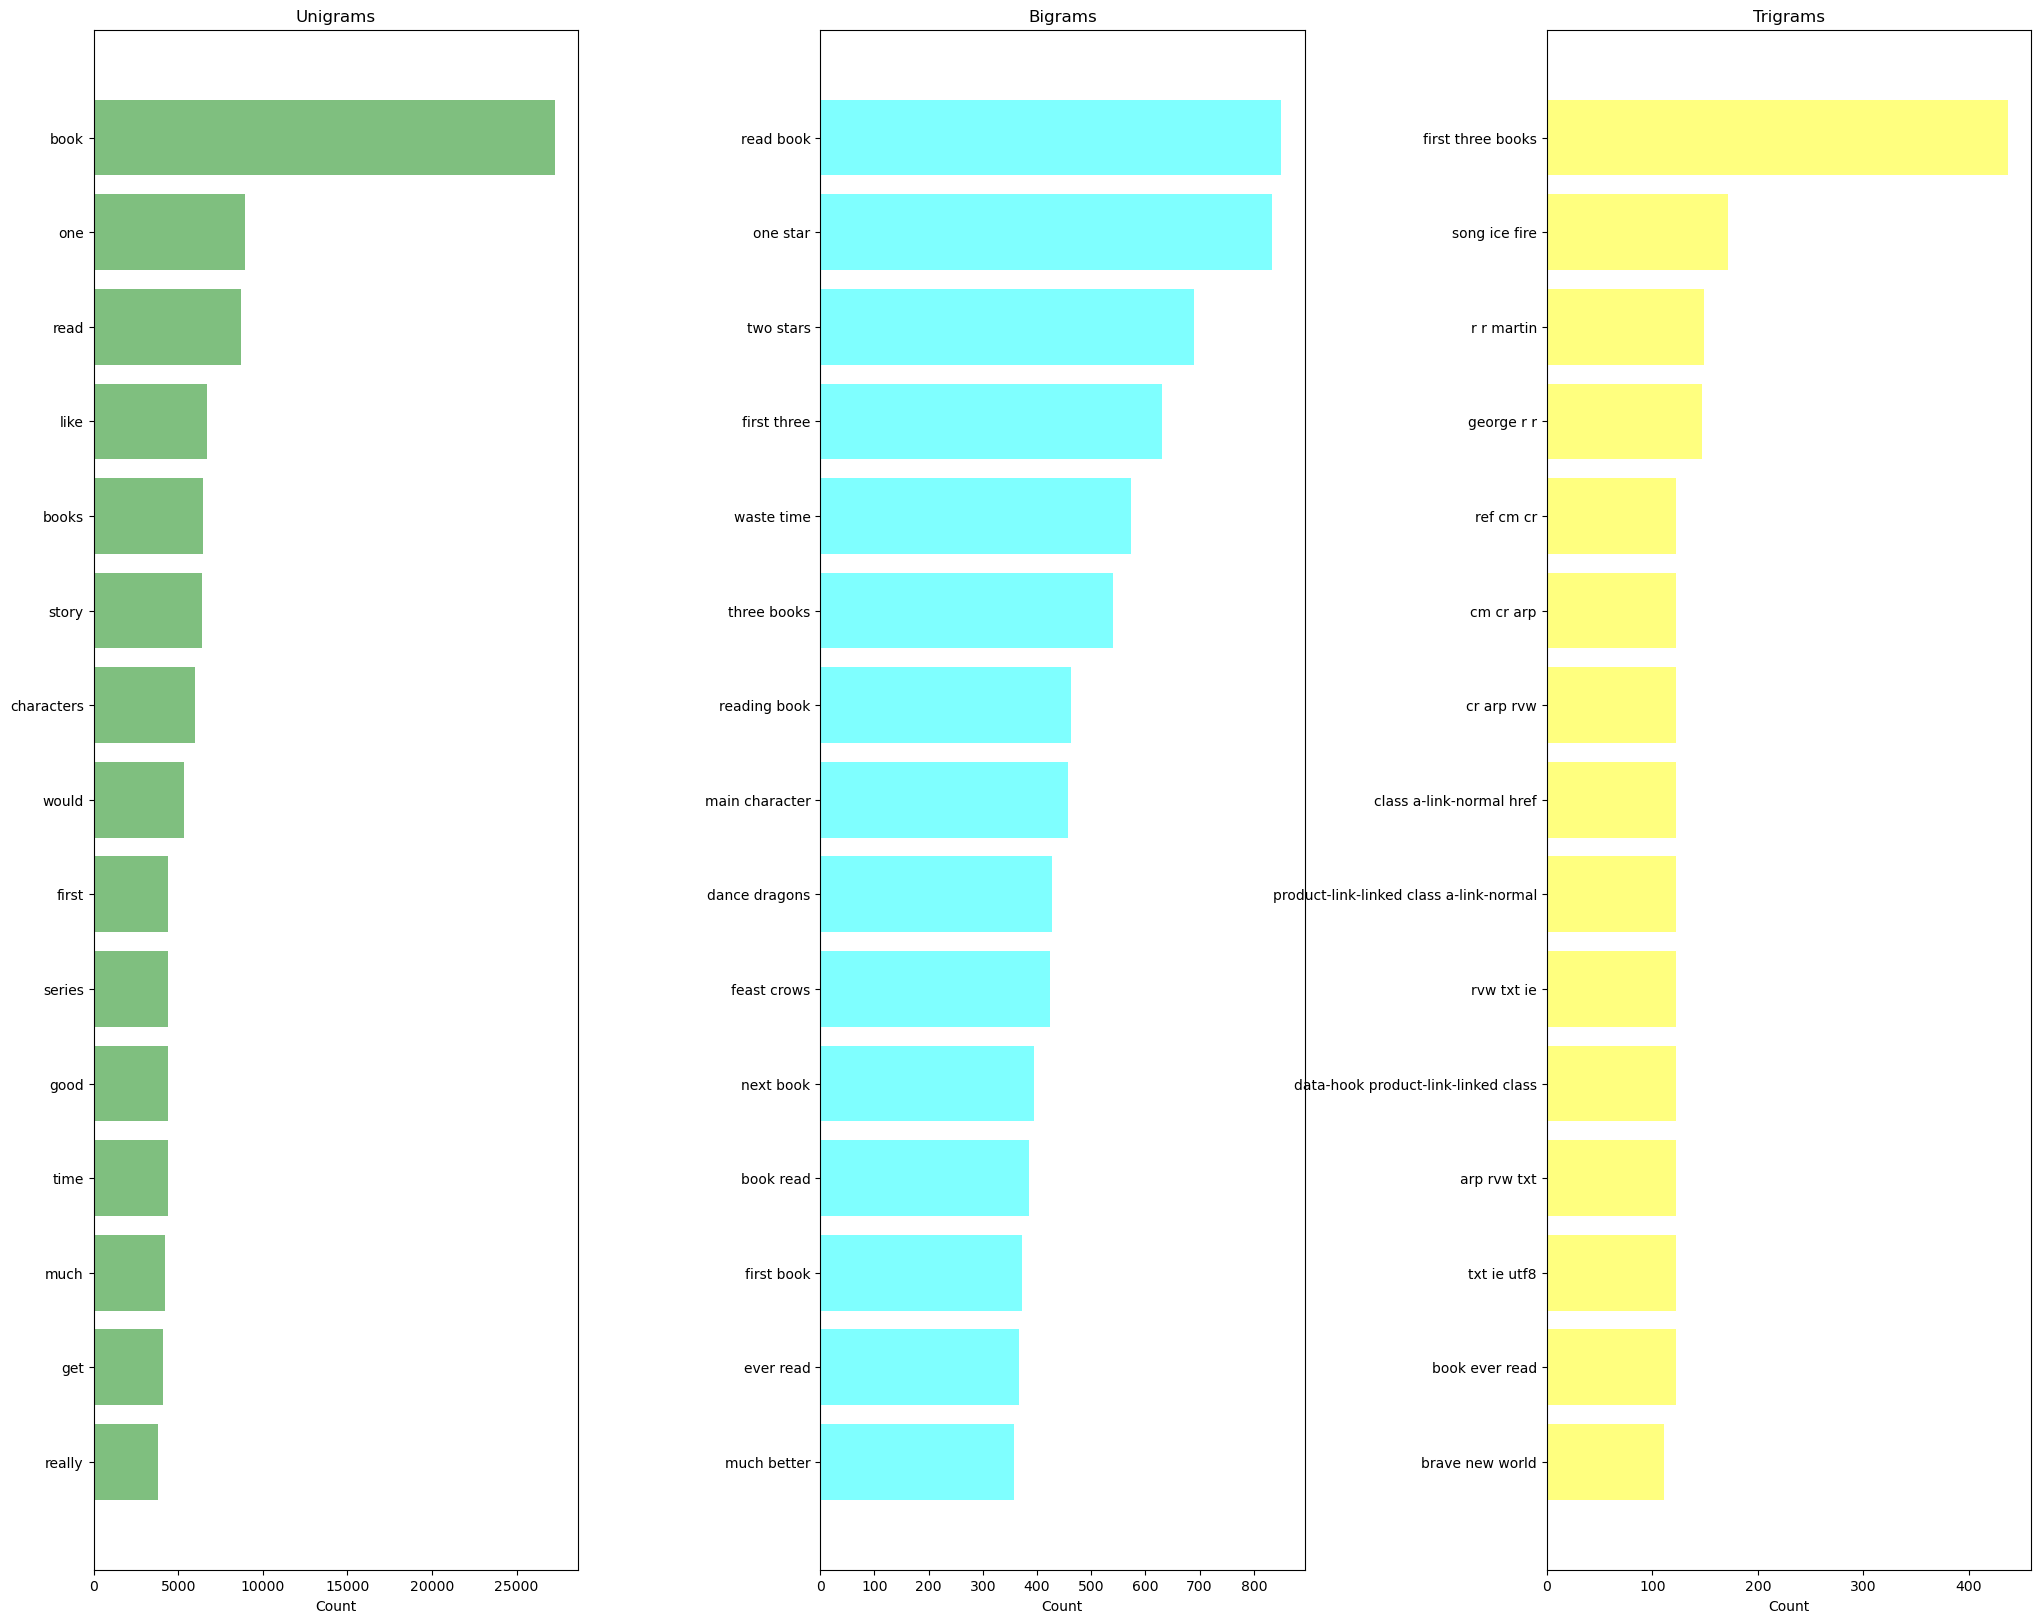

In [68]:
#Filtering data
import nltk
from collections import Counter
from nltk.util import ngrams
review_pos = df[df["sentiment"]=='Positive'].dropna()
review_neu = df[df["sentiment"]=='Neutral'].dropna()
review_neg = df[df["sentiment"]=='Negitive'].dropna()
plotNgrams(review_pos.text)
plotNgrams(review_neu.text)
plotNgrams(review_neg.text)

# CLASSIFICATION

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
x_train,x_test,y_train,y_test=train_test_split(df.text,df.sentiment,test_size=0.2,random_state=42)

In [126]:
vectorizer=TfidfVectorizer(stop_words=stopwords.words('english'))
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [127]:
log_reg = LogisticRegression()
d_tree = DecisionTreeClassifier()
r_forrest = RandomForestClassifier()
knn = KNeighborsClassifier()
naive_bayes = MultinomialNB()


model_map = {0:'Logistic Regression', 1:'Decision Tree', 2:'Random Forrest', 3:'KNN',4:"Naive Bayes"}
models = [log_reg, d_tree, r_forrest, knn, naive_bayes]

In [128]:
for i,model in enumerate(models):
    
    models[i].fit(x_train, y_train)
    y_pred = models[i].predict(x_test)
    y_train_pred = models[i].predict(x_train)
    
    print('Report of {}:' .format(model_map[i]))
    print('Train set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(y_train, y_train_pred)*100))
    print('Test set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(y_test, y_pred)*100))
    print('\n')
    print(classification_report(y_test, y_pred))
    print('\n')
    print('\n')

Report of Logistic Regression:
Train set accuracy of Logistic Regression: 91.43737 %
Test set accuracy of Logistic Regression: 89.71494 %


              precision    recall  f1-score   support

    Negitive       0.76      0.63      0.69      3074
     Neutral       0.59      0.27      0.37      2663
    Positive       0.92      0.98      0.95     29343

    accuracy                           0.90     35080
   macro avg       0.76      0.62      0.67     35080
weighted avg       0.88      0.90      0.88     35080





Report of Decision Tree:
Train set accuracy of Decision Tree: 99.99359 %
Test set accuracy of Decision Tree: 83.00456 %


              precision    recall  f1-score   support

    Negitive       0.47      0.43      0.45      3074
     Neutral       0.33      0.28      0.30      2663
    Positive       0.90      0.92      0.91     29343

    accuracy                           0.83     35080
   macro avg       0.57      0.54      0.55     35080
weighted avg       0.82    

# TIME SERIES ANALYSIS

In [11]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

In [12]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [13]:
trial = df.copy()
trial.set_index('reviewTime',drop=True,inplace=True)
trial.sort_index(inplace=True)

In [14]:
trial.head(1)

,Class,asin,verified,overall,unixReviewTime,reviewerName,reviewerID,title,price,category,brand,text,sentiment,neg,neu,pos,compound,year,month
reviewTime,,,,,,,,,,,,,,,,,,,
1997-01-09,pos,2254425,False,4,873072000,Thomasgraphics@msn.com,A1MGSWMY2FRBMF,Superstitious,4.96,"['Books', 'Literature & Fiction', 'Genre Ficti...",Visit Amazon's R L Stine Page,book alright think r l stine still goosebumps ...,Positive,0.066,0.724,0.21,0.9936,1997,9


In [15]:
def checkStationarity(test):
    pvalue = adfuller(test)[1]
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
    return(msg)

In [16]:
df.title.value_counts()

The Hobbit                                                                      18471
A Dance with Dragons                                                             9911
A Feast for Crows (Song of Ice and Fire)                                         4997
Magician's Nephew - Folio Society Hardcover                                      4972
Love's Labour's Lost: Performed by Derek Jacobi, Geraldine McEwan &amp; Cast     3371
                                                                                ...  
The Wild (Requiem for Homo Sapiens)                                                 1
Instant Entertaining                                                                1
The Tamuli: Domes of Fire/ The Shining Ones/ The Hidden City                        1
Drawing on the Artist Within                                                        1
Funniest Storybook Ever                                                             1
Name: title, Length: 881, dtype: int64

In [17]:
positive=trial[(trial['Class'] =='pos') & (trial['title'] == 'A Feast for Crows (Song of Ice and Fire)')]  # Positive
negative=trial[(trial['Class'] == 'neg') & (trial['title'] == 'A Feast for Crows (Song of Ice and Fire)')]  #Negative
neutral=trial[(trial['Class'] == 'neu')& (trial['title'] == 'A Feast for Crows (Song of Ice and Fire)')]    #Neutral

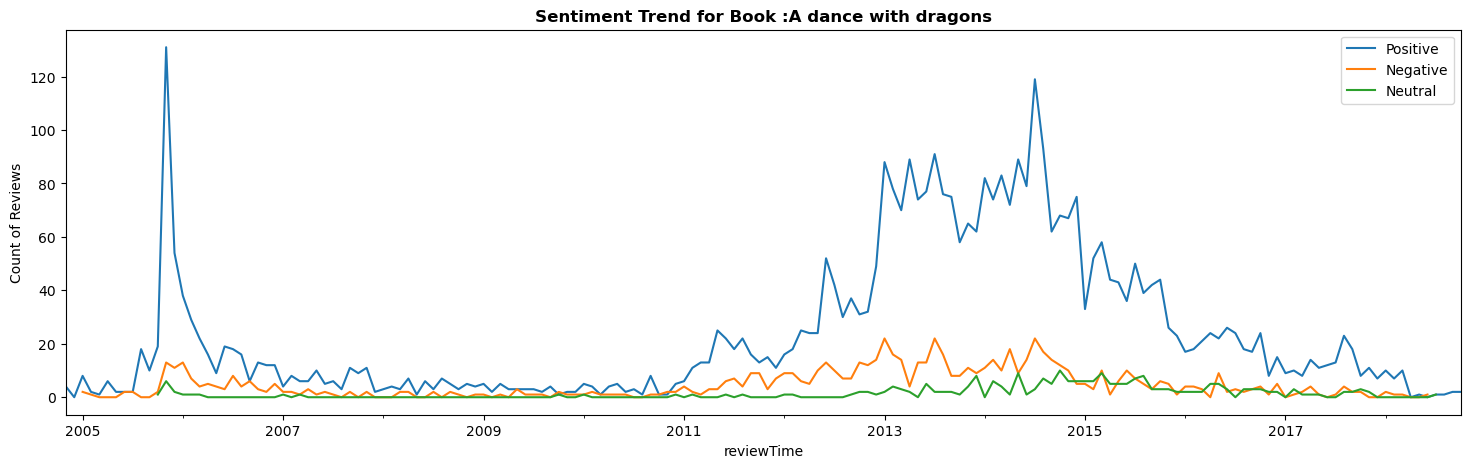

In [62]:
positive['reviewerID'].resample('M').count().plot(figsize=(18,5),label='Positive')
negative['reviewerID'].resample('M').count().plot(figsize=(18,5),label='Negative')
neutral['reviewerID'].resample('M').count().plot(figsize=(18,5),label='Neutral')
plt.legend()
plt.title('Sentiment Trend for Book :A dance with dragons',fontweight='bold')
plt.ylabel('Count of Reviews');

In [18]:
decomposition_p=seasonal_decompose(np.asarray(positive['reviewerID'].resample('M').count()), period=12)
d_trend_p=decomposition_p.trend
d_seasonal_p=decomposition_p.seasonal
d_residual_p=decomposition_p.resid

decomposition=seasonal_decompose(np.asarray(neutral['reviewerID'].resample('M').count()), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

decomposition_n=seasonal_decompose(np.asarray(negative['reviewerID'].resample('M').count()), period=12)
d_trend_n=decomposition_n.trend
d_seasonal_n=decomposition_n.seasonal
d_residual_n=decomposition_n.resid

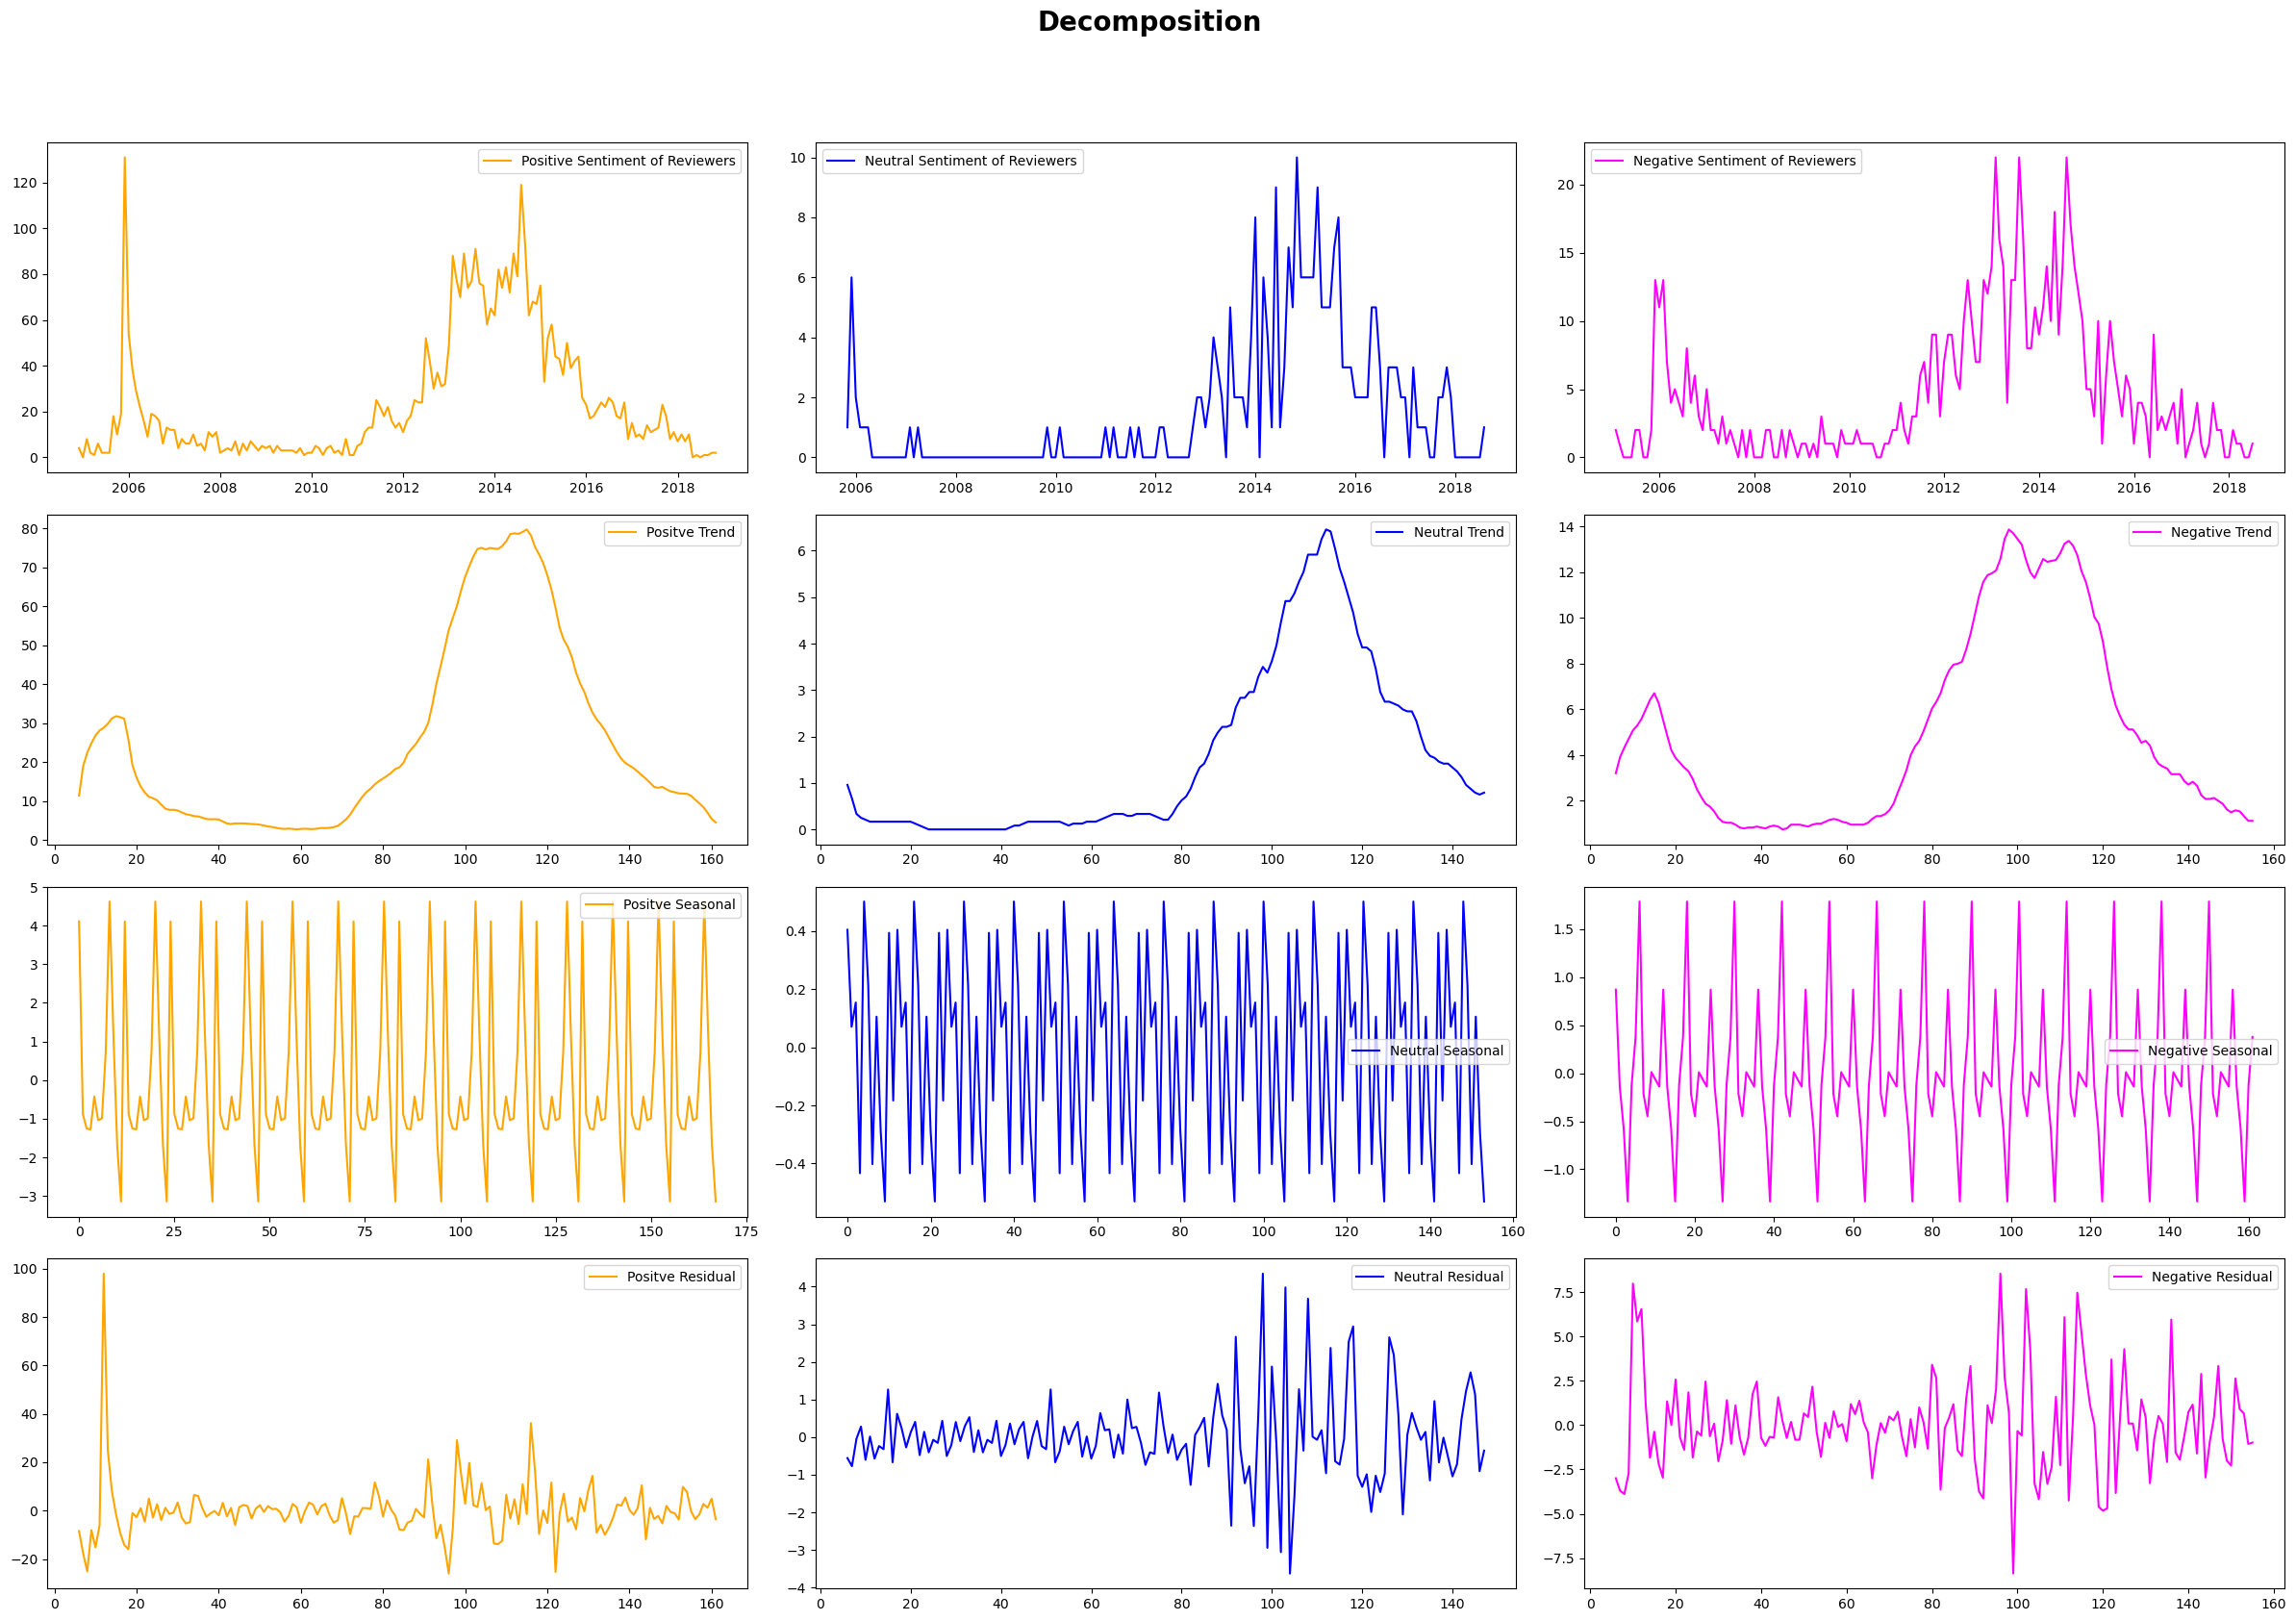

In [19]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,3,figsize=(24,16))
plt.subplot(4,3,1)
plt.plot(positive['reviewerID'].resample('M').count(),label='Positive Sentiment of Reviewers',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,2)
plt.plot(neutral['reviewerID'].resample('M').count(),label='Neutral Sentiment of Reviewers',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,3)
plt.plot(negative['reviewerID'].resample('M').count(),label='Negative Sentiment of Reviewers',color='magenta')
plt.legend(loc='best')


# Trend
plt.subplot(4,3,4)
plt.plot(d_trend_p,label='Positve Trend',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,5)
plt.plot(d_trend,label='Neutral Trend',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,6)
plt.plot(d_trend_n,label='Negative Trend',color='magenta')
plt.legend(loc='best')


# Seasonality
plt.subplot(4,3,7)
plt.plot(d_seasonal_p,label='Positve Seasonal',color='orange')
plt.legend(loc='best')


plt.subplot(4,3,8)
plt.plot(d_seasonal,label='Neutral Seasonal',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,9)
plt.plot(d_seasonal_n,label='Negative Seasonal',color='magenta')
plt.legend(loc='best')


# Residual
plt.subplot(4,3,10)
plt.plot(d_residual_p,label='Positve Residual',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,11)
plt.plot(d_residual,label='Neutral Residual',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,12)
plt.plot(d_residual_n,label='Negative Residual',color='magenta')
plt.legend(loc='best')

plt.suptitle('Decomposition',x=0.5,y=1.05,fontweight='bold',fontsize=20)
plt.tight_layout()

# Stationarity Check

In [20]:
positive1=positive['reviewerID'].resample('M').count()
negative1=negative['reviewerID'].resample('M').count()
neutral1=neutral['reviewerID'].resample('M').count()

In [21]:
checkStationarity(positive1.iloc[round(len(positive1)*0.7):])

'p-value=0.26172160899703195. Data is not stationary'

In [22]:
checkStationarity(negative1.iloc[round(len(negative1)*0.7):])

'p-value=0.0006221078393721834. Data is stationary'

In [23]:
checkStationarity(neutral1.iloc[round(len(neutral1)*0.7):])

'p-value=0.014125972723713189. Data is stationary'

In [24]:
diff_pos = positive1- positive1.shift()
#diff_neg = negative1- negative1.shift()
#diff_neu = neutral1 - neutral1.shift()
diff_pos.dropna(inplace=True)
#diff_neg.dropna(inplace=True)
#diff_neu.dropna(inplace=True)
diff_pos.head(3)


reviewTime
2004-12-31   -4.0
2005-01-31    8.0
2005-02-28   -6.0
Freq: M, Name: reviewerID, dtype: float64

In [25]:
checkStationarity(diff_pos.iloc[round(len(diff_pos)*0.7):])

'p-value=2.2328163637940975e-22. Data is stationary'

In [30]:
#checkStationarity(diff_neg.iloc[round(len(diff_neg)*0.7):])

In [31]:
#checkStationarity(diff_neu.iloc[round(len(diff_neu)*0.7):])

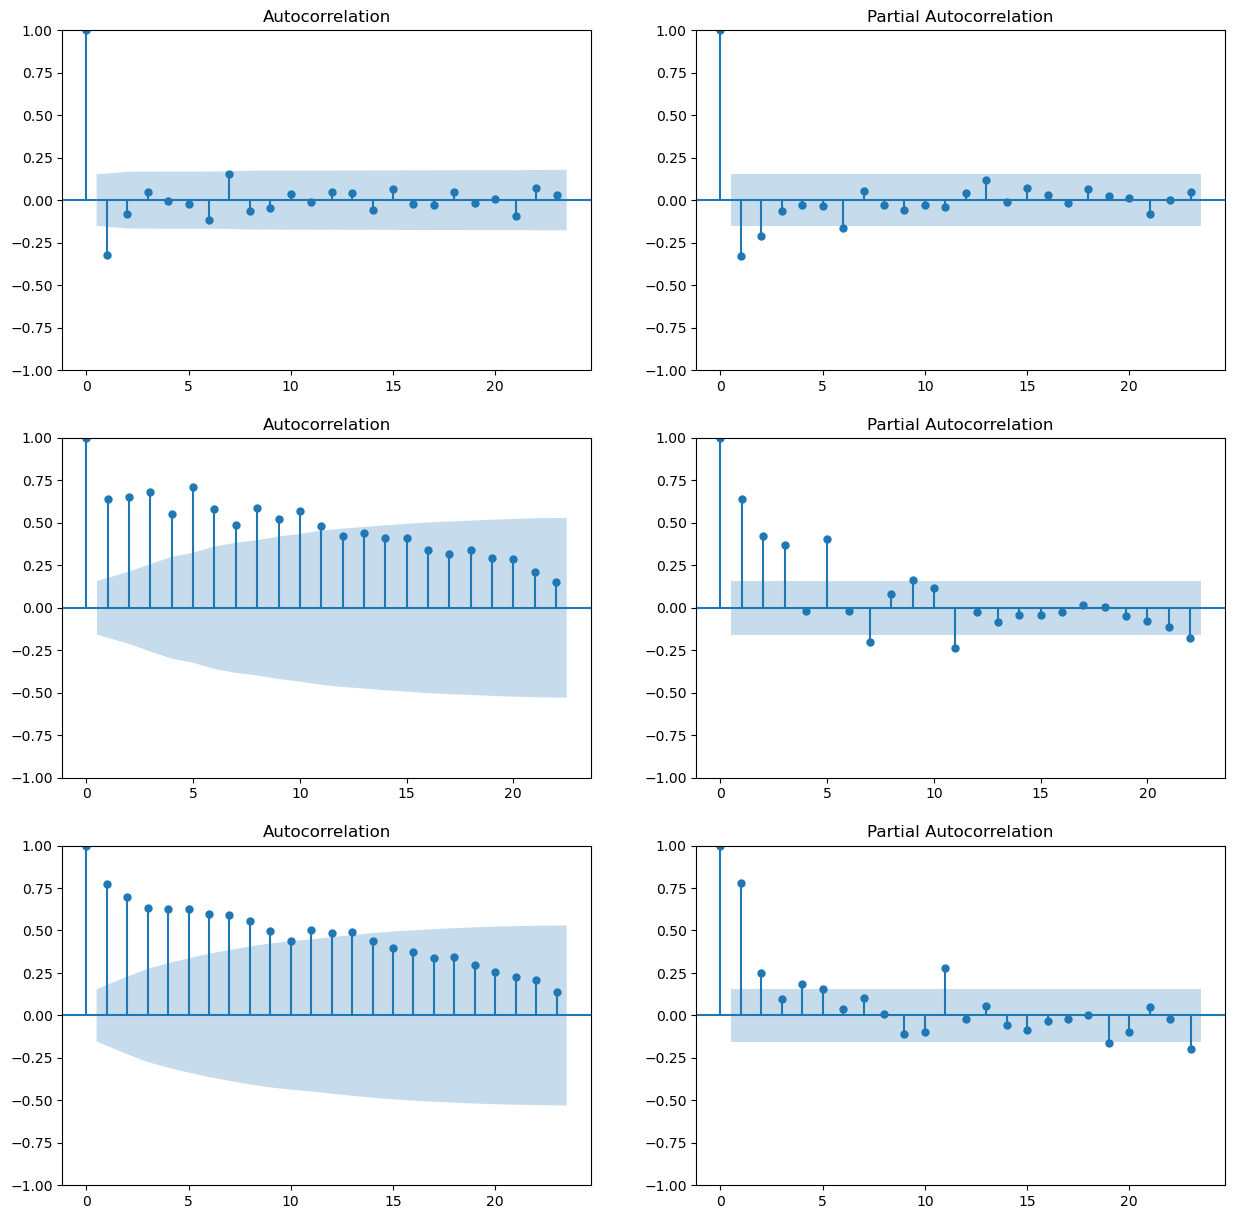

In [26]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
plot_acf(diff_pos,ax=ax[0,0])
plot_pacf(diff_pos,ax=ax[0,1])
plot_acf(neutral1,ax=ax[1,0])
plot_pacf(neutral1,ax=ax[1,1])
plot_acf(negative1,ax=ax[2,0])
plot_pacf(negative1,ax=ax[2,1])
plt.show()

# POSITIVE SENTIMENT

### SARIMA

In [27]:
train_pos=positive1[(positive1.index.year >= 2009) & (positive1.index.year <= 2017)]
test_pos=positive1[(positive1.index.year > 2017)]

In [28]:
sarima = SARIMAX(train_pos,order=(1,2,1),seasonal_order=(1,2,1,52)).fit()
sarima_train_pred = sarima.predict(0,(len(train_pos)-1))
sarima_test_pred = sarima.predict(len(train_pos),(len(train_pos)+len(test_pos)-1))
print(sarima.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                     SARIMAX Results                                      
Dep. Variable:                         reviewerID   No. Observations:                  108
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 52)   Log Likelihood                  -9.796
Date:                            Mon, 10 Apr 2023   AIC                             29.593
Time:                                    09:11:43   BIC                             23.058
Sample:                                01-31-2009   HQIC                            15.928
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7133    789.345      0.001      0.999   -1546.374    1547.801
ma.L1         -0.9343    279.594   

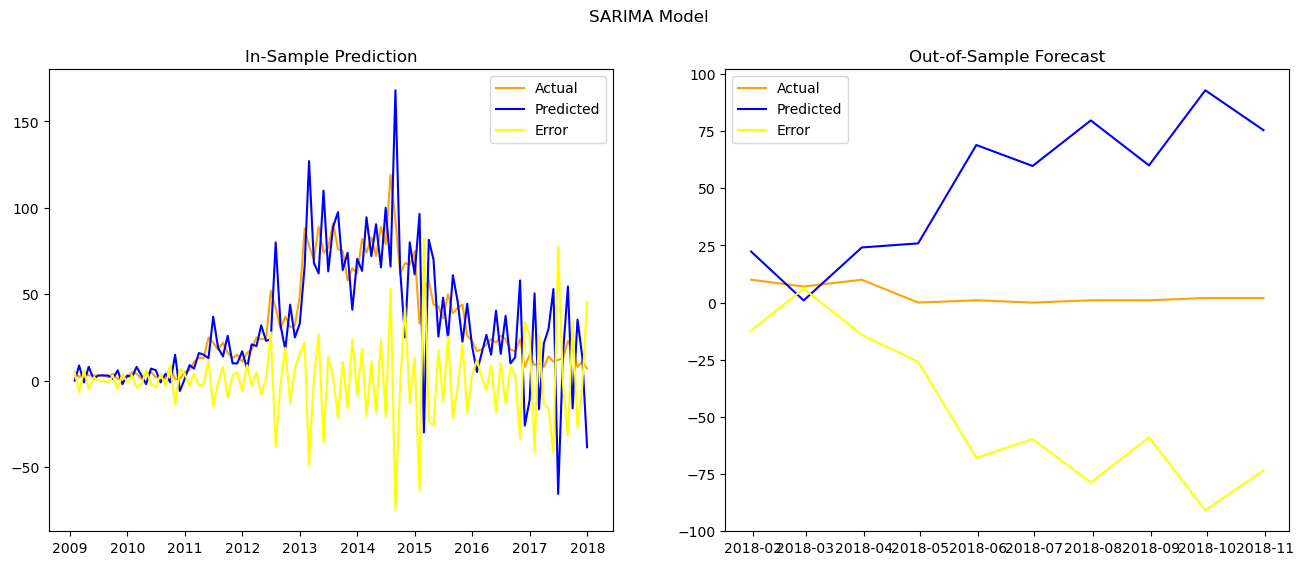

In [29]:
saim_train = pd.DataFrame({'Actual':train_pos,'Predicted':sarima_train_pred})
saim_test = pd.DataFrame({'Actual':test_pos,'Predicted':sarima_test_pred})
saim_train['Error']=saim_train['Actual']-saim_train['Predicted']
saim_test['Error']=saim_test['Actual']-saim_test['Predicted']
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)

plt.plot(saim_train['Actual'],color='orange',label='Actual')
plt.plot(saim_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim_test['Actual'],color='orange',label='Actual')
plt.plot(saim_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [30]:
np.sqrt(mean_squared_error(saim_test.Actual,saim_test.Predicted))

57.05743981991663

In [31]:
np.sqrt(mean_squared_error(saim_train.Actual,saim_train.Predicted))

23.163073738103193

### Positive Forecast

In [32]:
fortp=sarima.forecast(len(test_pos)+21)

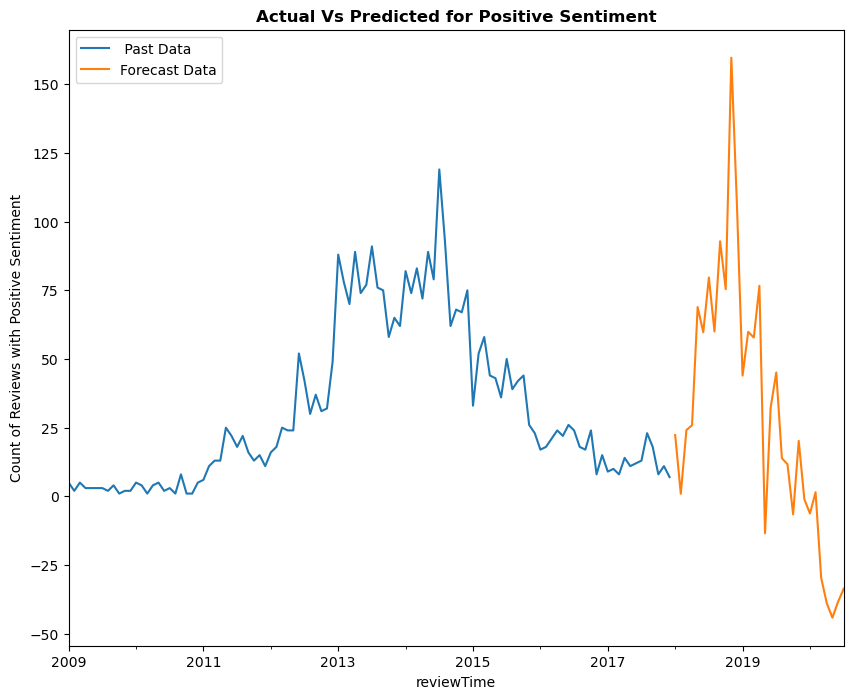

In [33]:
train_pos.plot(figsize=(10,8),legend=True,sharex=True,label=' Past Data')
# test_pos.plot(figsize=(10,8),legend=True,sharex=True)
fortp.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Positive Sentiment')
plt.title('Actual Vs Predicted for Positive Sentiment',fontweight='bold')
plt.show()

### Negative Sentiment

In [38]:
train_neg=negative1[(negative1.index.year >= 2010) & (negative1.index.year <= 2017)]
test_neg=negative1[(negative1.index.year > 2017)]

In [39]:
sarima11 = SARIMAX(train_neg,order=(1,1,1),seasonal_order=(3,2,4,52)).fit()
sarima11_train_pred = sarima11.predict(0,(len(train_neg)-1))
sarima11_test_pred = sarima11.predict(len(train_neg),(len(train_neg)+len(test_neg)-1))
print(sarima11.summary())
ljung11 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung11}')

                                           SARIMAX Results                                           
Dep. Variable:                                    reviewerID   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(3, 2, [1, 2, 3, 4], 52)   Log Likelihood                   0.000
Date:                                       Mon, 10 Apr 2023   AIC                             20.000
Time:                                               09:18:15   BIC                                nan
Sample:                                           01-31-2010   HQIC                               nan
                                                - 12-31-2017                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0     

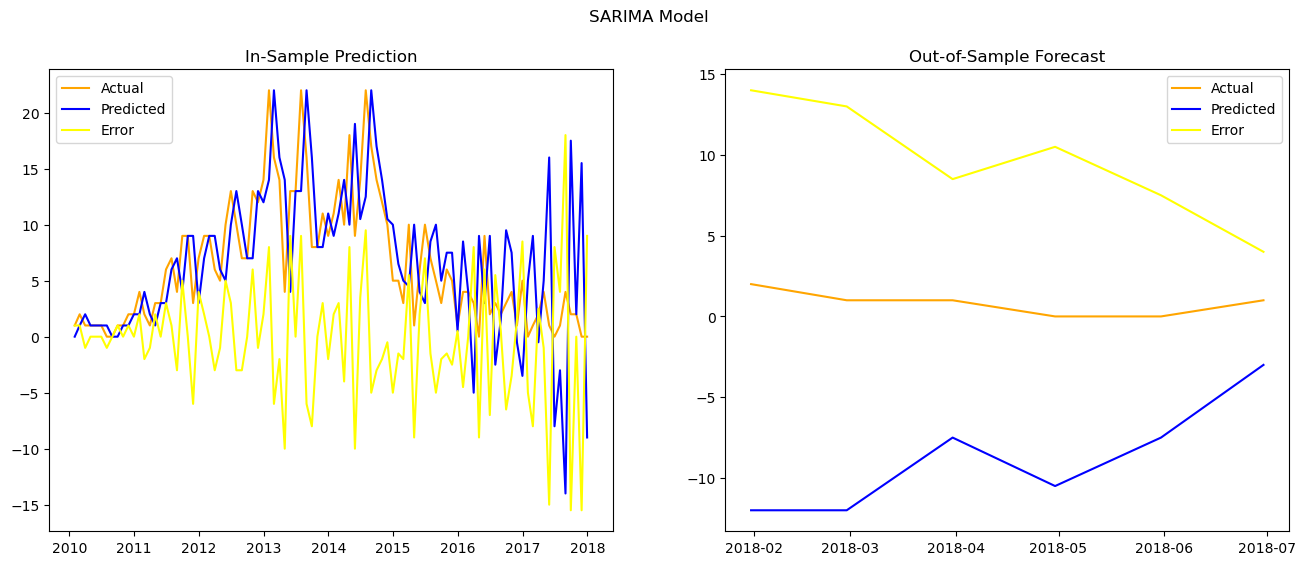

In [40]:
saim11_train = pd.DataFrame({'Actual':train_neg,'Predicted':sarima11_train_pred})
saim11_test = pd.DataFrame({'Actual':test_neg,'Predicted':sarima11_test_pred})
saim11_train['Error']=saim11_train['Actual']-saim11_train['Predicted']
saim11_test['Error']=saim11_test['Actual']-saim11_test['Predicted']

plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)

plt.plot(saim11_train['Actual'],color='orange',label='Actual')
plt.plot(saim11_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim11_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim11_test['Actual'],color='orange',label='Actual')
plt.plot(saim11_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim11_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [41]:
np.sqrt(mean_squared_error(saim11_test.Actual,saim11_test.Predicted))

10.163252339924794

In [42]:
np.sqrt(mean_squared_error(saim11_train.Actual,saim11_train.Predicted))

5.559105222437315

### Negative Forecast

In [43]:
fortng=sarima11.forecast(len(test_neg)+20)

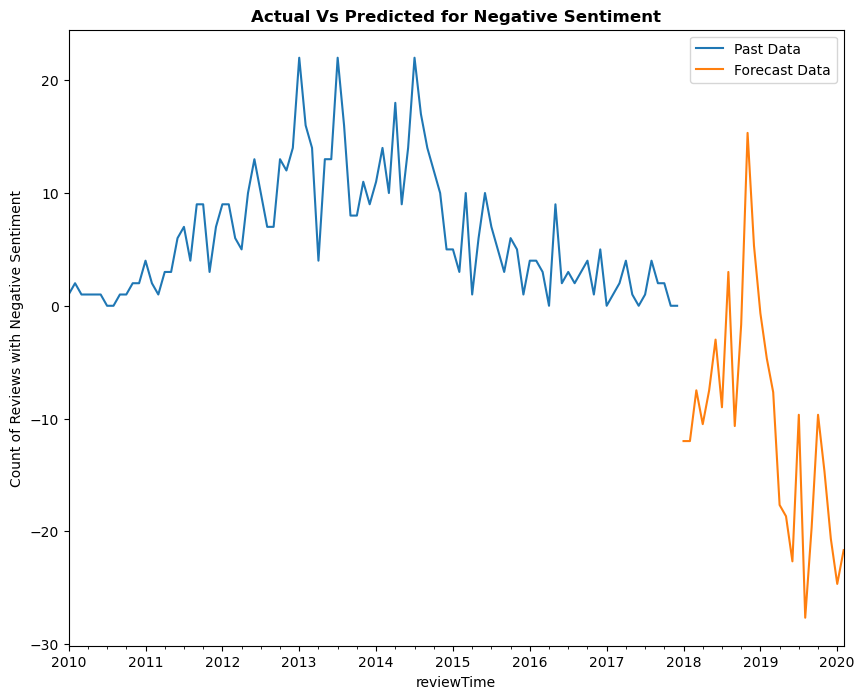

In [44]:
train_neg.plot(figsize=(10,8),legend=True,sharex=True,label='Past Data')
# test_neg.plot(figsize=(10,8),legend=True,sharex=True)
fortng.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Negative Sentiment')
plt.title('Actual Vs Predicted for Negative Sentiment',fontweight='bold')
plt.show()

### Neutral Sentiment

In [45]:
train_neu=neutral1[(neutral1.index.year >= 2008) & (neutral1.index.year <= 2016)]
test_neu=neutral1[(neutral1.index.year > 2016)]

In [46]:
sarima12 = SARIMAX(train_neu,order=(1,1,1),seasonal_order=(1,1,1,52)).fit()
sarima12_train_pred = sarima12.predict(0,(len(train_neu)-1))
sarima12_test_pred = sarima12.predict(len(train_neu),(len(train_neu)+len(test_neu)-1))
print(sarima11.summary())
ljung12 = sm.stats.acorr_ljungbox(sarima12.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung12}')

                                           SARIMAX Results                                           
Dep. Variable:                                    reviewerID   No. Observations:                   96
Model:             SARIMAX(1, 2, 1)x(3, 2, [1, 2, 3, 4], 52)   Log Likelihood                   0.000
Date:                                       Mon, 27 Mar 2023   AIC                             20.000
Time:                                               16:27:09   BIC                                nan
Sample:                                           01-31-2008   HQIC                               nan
                                                - 12-31-2015                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0     

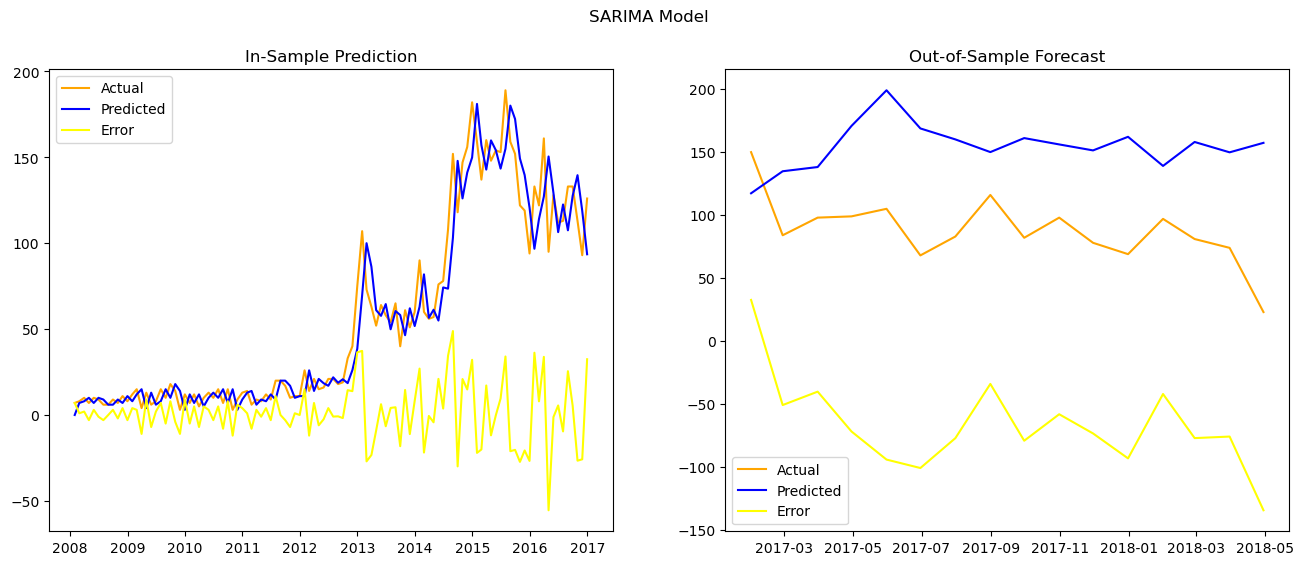

In [47]:
saim12_train = pd.DataFrame({'Actual':train_neu,'Predicted':sarima12_train_pred})
saim12_test = pd.DataFrame({'Actual':test_neu,'Predicted':sarima12_test_pred})
saim12_train['Error']=saim12_train['Actual']-saim12_train['Predicted']
saim12_test['Error']=saim12_test['Actual']-saim12_test['Predicted']
plt.subplots(1,2,figsize=(16,6)) 

plt.subplot(1,2,1)
plt.plot(saim12_train['Actual'],color='orange',label='Actual')
plt.plot(saim12_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim12_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim12_test['Actual'],color='orange',label='Actual')
plt.plot(saim12_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim12_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [48]:
np.sqrt(mean_squared_error(saim12_test.Actual,saim12_test.Predicted))

75.74114817509106

In [49]:
np.sqrt(mean_squared_error(saim12_train.Actual,saim12_train.Predicted))

16.476967883796398

### Neutral Forecast

In [50]:
fortne=sarima12.forecast(len(test_neu)+21)

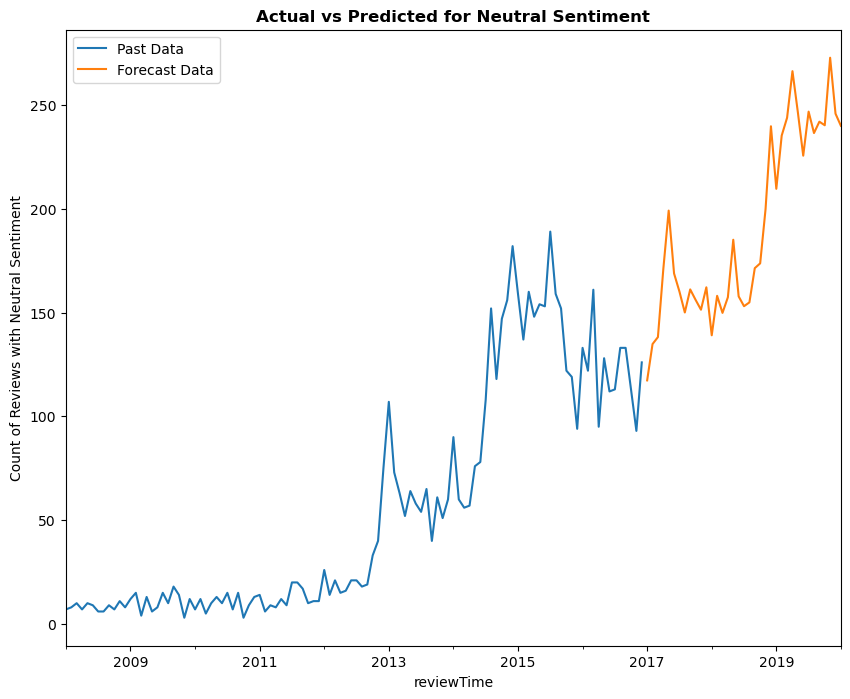

In [51]:
train_neu.plot(figsize=(10,8),legend=True,sharex=True,label='Past Data')
# test_neu.plot(figsize=(10,8),legend=True,sharex=True)
fortne.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Neutral Sentiment')
plt.title('Actual vs Predicted for Neutral Sentiment',fontweight='bold')
plt.show()

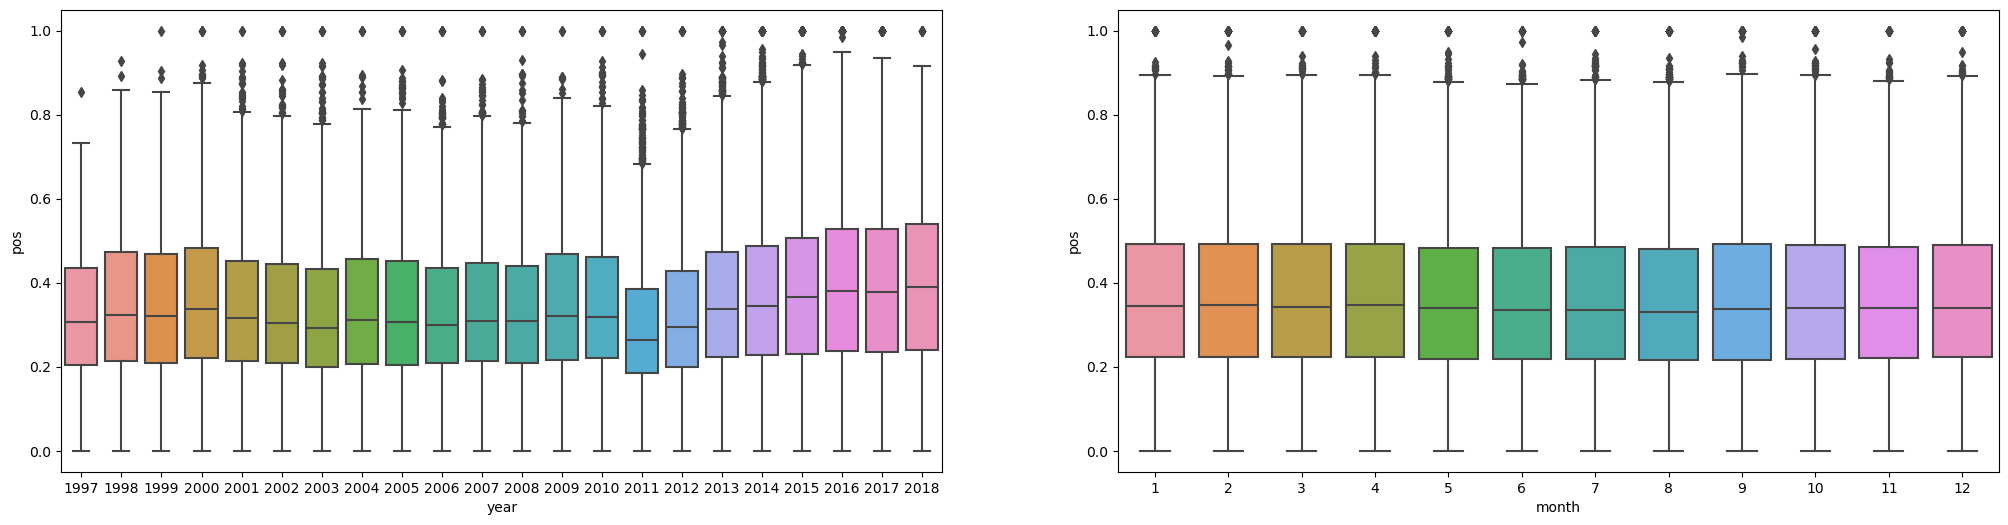

In [52]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df.year, df.pos)

plt.subplot(1, 2, 2)

sns.boxplot(df.month, df.pos)
plt.show()

<AxesSubplot:xlabel='year', ylabel='count'>

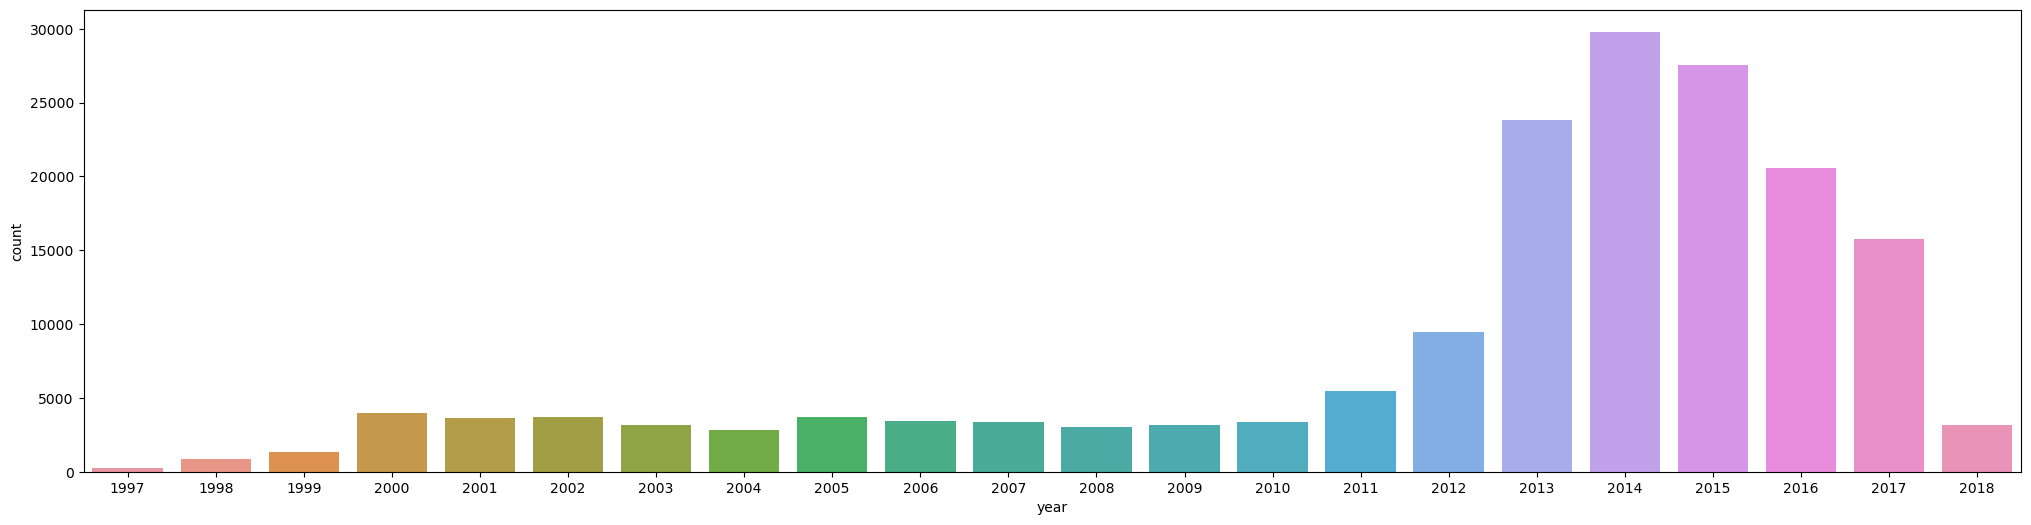

In [94]:
plt.figure(figsize=(25, 6))
sns.countplot(df.year)

<AxesSubplot:xlabel='month', ylabel='count'>

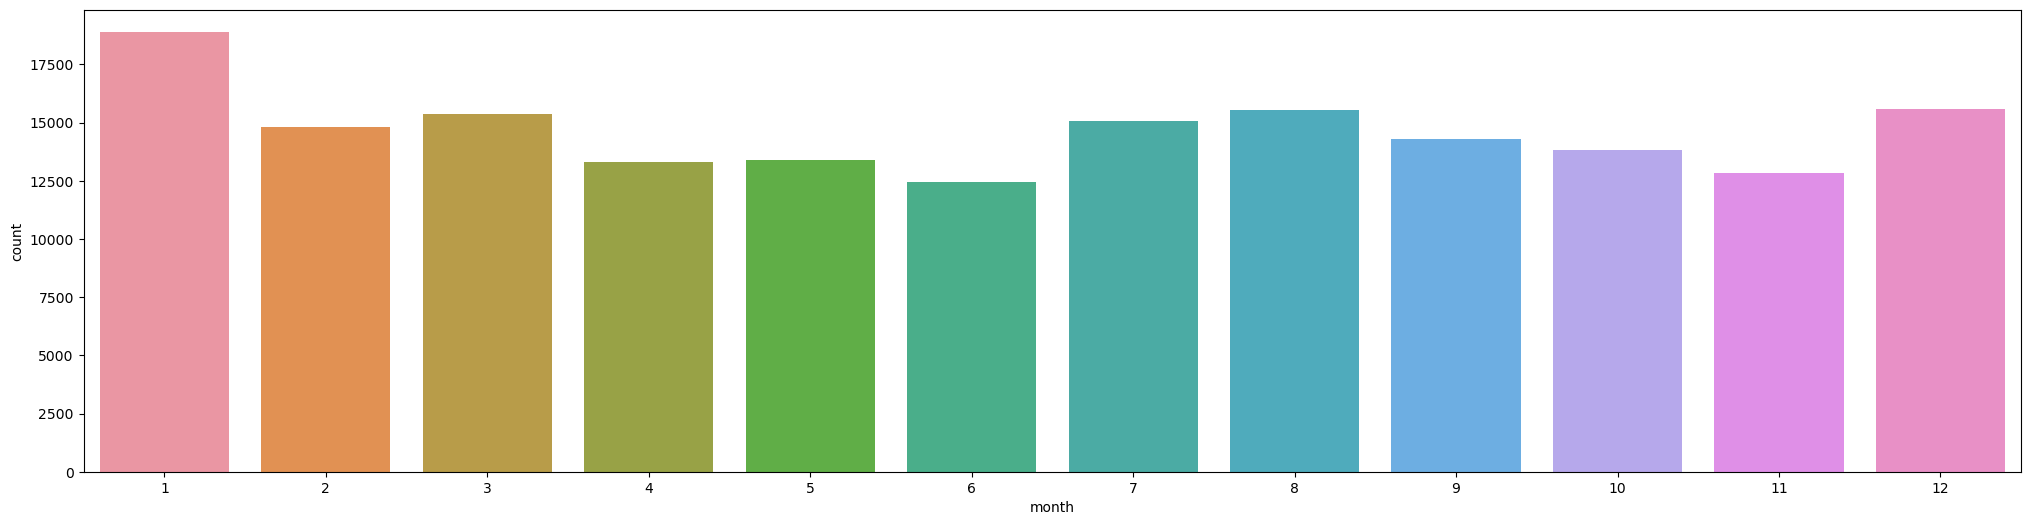

In [95]:
plt.figure(figsize=(25, 6))
sns.countplot(df.month)

# CLUSTERING

In [155]:
df.head(1)

,Class,asin,verified,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,title,price,category,brand,text,sentiment,neg,neu,pos,compound,year,month
0,pos,0001713353,False,5.0,1123804800,June Bug,2005-08-12,A1C6M8LCIX4M6M,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,book winner boys really enjoy pictures story c...,Positive,0.0,0.405,0.595,0.8832,2005,8


In [44]:
X = df.iloc[:10000]
X.head(3)

,Class,asin,verified,overall,unixReviewTime,reviewerName,reviewTime,reviewerID,title,price,category,brand,text,sentiment,neg,neu,pos,compound,year,month
0,pos,1713353,False,5,1123804800,June Bug,2005-12-08,A1C6M8LCIX4M6M,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,book winner boys really enjoy pictures story c...,Positive,0.000,0.405,0.595,0.8832,2005,8
1,pos,1713353,False,5,1112140800,TW Ervin II,2005-03-30,A1REUF3A1YCPHM,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,king mice cheese nancy gurney excellent childr...,Positive,0.051,0.652,0.297,0.9790,2005,3
2,pos,1713353,False,5,1081036800,Rebecca L. Menner,2004-04-04,A1YRBRK2XM5D5,"King, the Mice and the Cheese (Beginner Books)",12.33,"['Books', ""Children's Books"", 'Literature & Fi...",Visit Amazon's Nancy Gurney Page,daughter got first copy great-grandmother fath...,Positive,0.106,0.456,0.438,0.9460,2004,4


In [45]:
X1 = X[['compound','unixReviewTime']]

In [46]:
X1.dtypes

compound          float64
unixReviewTime      int64
dtype: object

In [177]:
#Scaler = StandardScaler()
#for i in X1.columns:
#    X1[i] = Scaler.fit_transform(np.array(X1[i]).reshape(-1, 1))

In [47]:
X2 = pd.DataFrame(X1)

# KMEANS

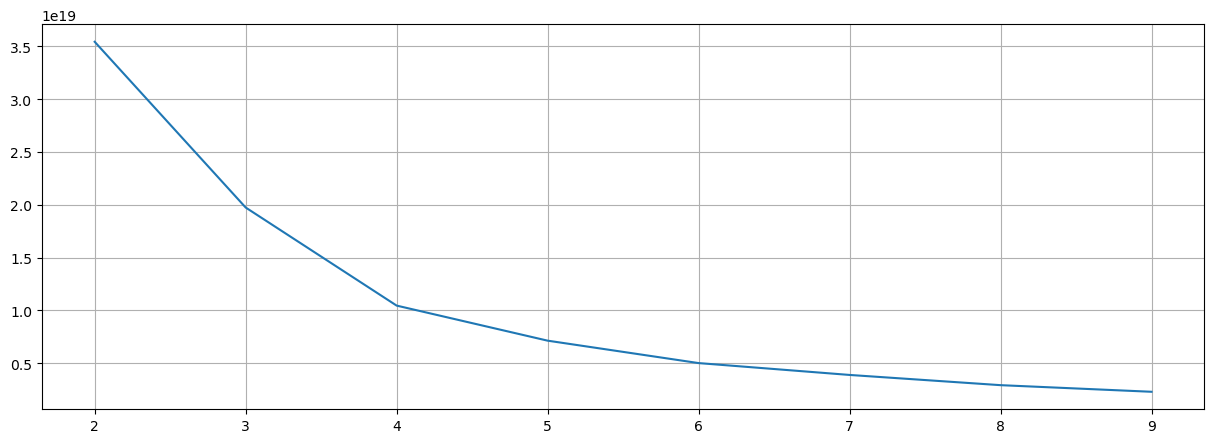

In [48]:
### from sklearn.cluster import KMeans
X2 = X2.values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X2)
    distortion.append(kmeans.inertia_)
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

In [49]:
model1 = KMeans(n_clusters = 3, random_state = 10).fit(X2)
pred = model1.fit_predict(X2)

In [50]:
c_centre = model1.cluster_centers_
c_centre

array([[6.81386356e-01, 1.39018015e+09],
       [6.67842024e-01, 1.10740266e+09],
       [6.17126285e-01, 1.47753471e+09]])

In [51]:
k_label = model1.labels_
k_label

array([1, 1, 1, ..., 0, 0, 0])

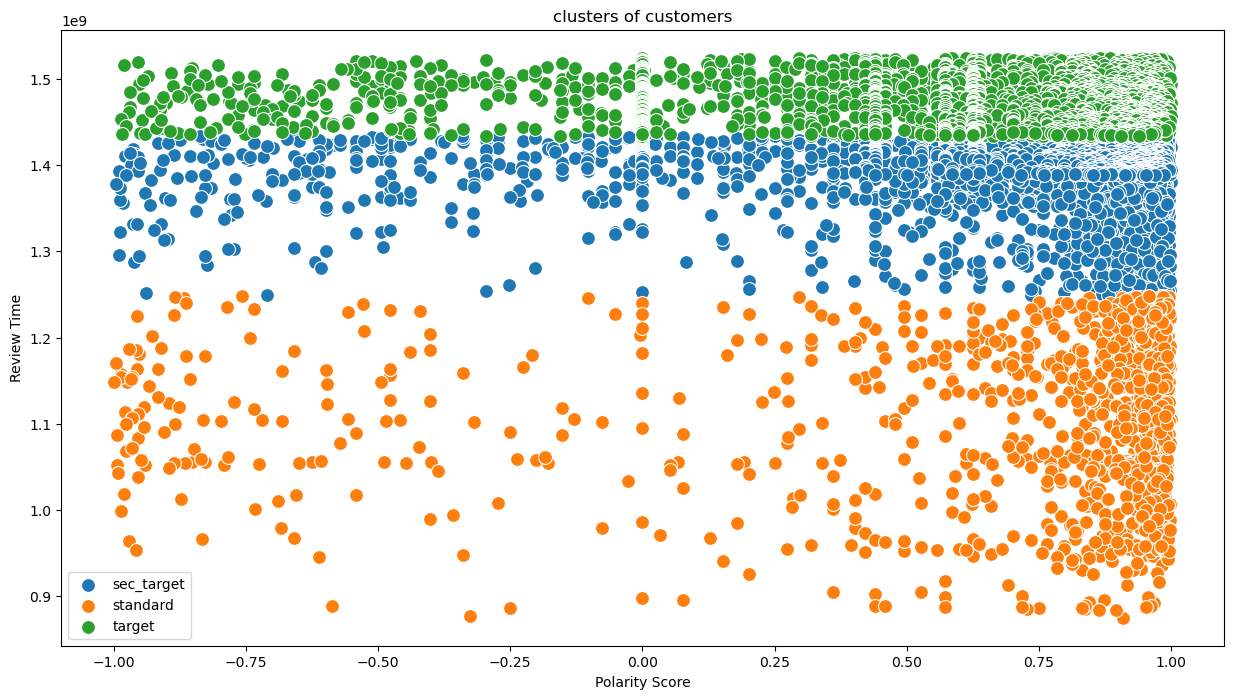

In [56]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x=X2[pred==0,0] ,y=X2[pred==0,1] ,s=100,label ='sec_target')
sns.scatterplot(x=X2[pred==1,0] ,y=X2[pred==1,1],s=100,label ='standard')
sns.scatterplot(x=X2[pred==2,0] ,y=X2[pred==2,1] ,s=100,label ='target')
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=200,label="center",color ='black')
plt.title("clusters of customers")
plt.xlabel("Polarity Score")
plt.ylabel("Review Time");